# Agentic Underwriting Assistant

## Data Exploration and Analysis

First, we explore the datasets for the underwriting system. We'll examine policyholder demographics, claims history, policy details, and document corpus to understand the data structure and identify key patterns for risk assessment.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Libraries imported successfully!")
print(" Starting data exploration...")


 Libraries imported successfully!
 Starting data exploration...


In [2]:
# Load datasets
data_path = Path("../data/raw")

# Load tabular datasets
print(" Loading datasets...")
policyholders = pd.read_csv(data_path / "policyholder_demographics.csv")
claims = pd.read_csv(data_path / "historical_claims.csv")
policies = pd.read_csv(data_path / "policy_details.csv")

# Load document corpus
with open(data_path / "document_corpus.json", 'r', encoding='utf-8') as f:
    documents = json.load(f)

print(" All datasets loaded successfully!")
print(f" Policyholders: {len(policyholders):,}")
print(f" Claims: {len(claims):,}")
print(f" Policies: {len(policies):,}")
print(f" Documents: {len(documents)}")


 Loading datasets...
 All datasets loaded successfully!
 Policyholders: 1,000
 Claims: 2,000
 Policies: 1,494
 Documents: 6


## 1. Policyholder Demographics Analysis

Analyze the demographic characteristics of policyholders including age, gender, income, education, employment status, and credit scores. This section provides insights into the customer base and potential risk factors.


In [3]:
# Examine policyholder demographics
print(" Policyholder Demographics Overview")
print("=" * 50)
print(f"Total policyholders: {len(policyholders):,}")
print(f"Columns: {list(policyholders.columns)}")
print("\nFirst 5 rows:")
policyholders.head()


 Policyholder Demographics Overview
Total policyholders: 1,000
Columns: ['policyholder_id', 'age', 'gender', 'marital_status', 'annual_income', 'education_level', 'employment_status', 'credit_score', 'years_at_address', 'created_date']

First 5 rows:


,policyholder_id,age,gender,marital_status,annual_income,education_level,employment_status,credit_score,years_at_address,created_date
0,PH_000001,52,Male,Single,33.60,Master,Employed,573,14.4,2024-10-27 20:57:36.461722
1,PH_000002,42,Male,Single,64.65,PhD,Self-employed,537,2.0,2025-07-24 20:57:36.461722
2,PH_000003,54,Female,Single,142.60,Bachelor,Employed,680,4.1,2025-09-07 20:57:36.461722
3,PH_000004,67,Female,Married,36.84,High School,Retired,522,0.5,2025-05-02 20:57:36.461722
4,PH_000005,41,Male,Divorced,20.00,Master,Employed,608,1.1,2025-05-17 20:57:36.461722


In [4]:
# Summary statistics for numerical variables
print(" Summary Statistics - Policyholder Demographics")
print("=" * 60)
policyholders.describe()


 Summary Statistics - Policyholder Demographics


,age,annual_income,credit_score,years_at_address
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.904000,76.560590,644.012000,4.646400
std,14.178639,66.372364,98.524347,4.623952
min,18.000000,20.000000,360.000000,0.000000
25%,35.000000,30.990000,575.750000,1.300000
50%,45.000000,55.215000,645.000000,3.100000
75%,54.000000,94.707500,712.250000,6.300000
max,80.000000,500.000000,850.000000,27.600000


In [5]:
# Categorical variables analysis
print(" Categorical Variables Distribution")
print("=" * 50)

categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(policyholders[col].value_counts())
    print(f"Missing values: {policyholders[col].isnull().sum()}")


 Categorical Variables Distribution

GENDER:
gender
Male      509
Female    491
Name: count, dtype: int64
Missing values: 0

MARITAL_STATUS:
marital_status
Married     502
Single      306
Divorced    135
Widowed      57
Name: count, dtype: int64
Missing values: 0

EDUCATION_LEVEL:
education_level
High School    416
Bachelor       332
Master         195
PhD             57
Name: count, dtype: int64
Missing values: 0

EMPLOYMENT_STATUS:
employment_status
Employed         601
Self-employed    191
Retired          109
Unemployed        99
Name: count, dtype: int64
Missing values: 0


In [6]:
# Key variables analysis
print(" Key Variables Analysis")
print("=" * 40)

# Credit Score Analysis
print("\n CREDIT SCORE:")
print(f"Mean: {policyholders['credit_score'].mean():.1f}")
print(f"Median: {policyholders['credit_score'].median():.1f}")
print(f"Min: {policyholders['credit_score'].min()}")
print(f"Max: {policyholders['credit_score'].max()}")
print(f"Std: {policyholders['credit_score'].std():.1f}")

# Income Analysis (in thousands)
print(f"\n ANNUAL INCOME (in thousands):")
print(f"Mean: ${policyholders['annual_income'].mean():.2f}K")
print(f"Median: ${policyholders['annual_income'].median():.2f}K")
print(f"Min: ${policyholders['annual_income'].min():.2f}K")
print(f"Max: ${policyholders['annual_income'].max():.2f}K")

# Age Analysis
print(f"\n AGE:")
print(f"Mean: {policyholders['age'].mean():.1f} years")
print(f"Median: {policyholders['age'].median():.1f} years")
print(f"Min: {policyholders['age'].min()} years")
print(f"Max: {policyholders['age'].max()} years")


 Key Variables Analysis

 CREDIT SCORE:
Mean: 644.0
Median: 645.0
Min: 360
Max: 850
Std: 98.5

 ANNUAL INCOME (in thousands):
Mean: $76.56K
Median: $55.22K
Min: $20.00K
Max: $500.00K

 AGE:
Mean: 44.9 years
Median: 45.0 years
Min: 18 years
Max: 80 years


## 2. Claims Analysis

Examine historical claims data including claim amounts, types, severity levels, and status. This analysis helps identify patterns in claims behavior and assess risk factors associated with different types of claims.


In [7]:
# Examine claims data
print(" Claims Data Overview")
print("=" * 40)
print(f"Total claims: {len(claims):,}")
print(f"Columns: {list(claims.columns)}")
print("\nFirst 5 rows:")
claims.head()


 Claims Data Overview
Total claims: 2,000
Columns: ['claim_id', 'policyholder_id', 'claim_type', 'claim_amount', 'severity', 'status', 'claim_date', 'description']

First 5 rows:


,claim_id,policyholder_id,claim_type,claim_amount,severity,status,claim_date,description
0,CL_000001,PH_000558,Health,193.93,Low,Closed,2024-06-16 20:57:36.472984,Health claim - Low severity
1,CL_000002,PH_000664,Property,4380.91,High,Open,2024-11-18 20:57:36.472984,Property claim - High severity
2,CL_000003,PH_000931,Property,3286.37,High,Closed,2024-03-24 20:57:36.472984,Property claim - High severity
3,CL_000004,PH_000847,Auto,2714.83,High,Closed,2024-12-02 20:57:36.472984,Auto claim - High severity
4,CL_000005,PH_000074,Auto,1049.43,Low,Denied,2025-05-20 20:57:36.472984,Auto claim - Low severity


In [8]:
# Claims analysis
print(" Claims Analysis")
print("=" * 30)

# Claim amounts
print(f"\n CLAIM AMOUNTS:")
print(f"Mean: ${claims['claim_amount'].mean():.2f}")
print(f"Median: ${claims['claim_amount'].median():.2f}")
print(f"Min: ${claims['claim_amount'].min():.2f}")
print(f"Max: ${claims['claim_amount'].max():.2f}")
print(f"Total: ${claims['claim_amount'].sum():,.2f}")

# Claim types
print(f"\n CLAIM TYPES:")
print(claims['claim_type'].value_counts())

# Claim severity
print(f"\n CLAIM SEVERITY:")
print(claims['severity'].value_counts())

# Claim status
print(f"\n CLAIM STATUS:")
print(claims['status'].value_counts())


 Claims Analysis

 CLAIM AMOUNTS:
Mean: $1703.58
Median: $744.26
Min: $86.38
Max: $36264.67
Total: $3,407,153.05

 CLAIM TYPES:
claim_type
Auto          772
Property      511
Health        383
Life          222
Disability    112
Name: count, dtype: int64

 CLAIM SEVERITY:
severity
Low         988
Medium      593
High        307
Critical    112
Name: count, dtype: int64

 CLAIM STATUS:
status
Closed          1403
Open             199
Denied           199
Under Review     199
Name: count, dtype: int64


## 3. Policy Details Analysis

Review policy information including coverage amounts, premium calculations, deductibles, and policy types. This section analyzes the relationship between policy characteristics and risk factors.


In [9]:
# Examine policy details
print(" Policy Details Overview")
print("=" * 40)
print(f"Total policies: {len(policies):,}")
print(f"Columns: {list(policies.columns)}")
print("\nFirst 3 rows:")
policies.head(3)


 Policy Details Overview
Total policies: 1,494
Columns: ['policy_id', 'policyholder_id', 'policy_type', 'coverage_amount', 'premium_amount', 'status', 'start_date', 'end_date', 'deductible', 'coverage_limits']

First 3 rows:


,policy_id,policyholder_id,policy_type,coverage_amount,premium_amount,status,start_date,end_date,deductible,coverage_limits
0,POL_PH_000001_1,PH_000001,Auto,91.34,100,Active,2023-10-12 20:57:36.558125,2024-10-11 20:57:36.558125,2858.72,"{'per_incident': 73.07, 'annual': 91.34, 'life..."
1,POL_PH_000001_2,PH_000001,Home,58.06,100,Active,2024-12-14 20:57:36.558125,2025-12-14 20:57:36.558125,3348.45,"{'per_incident': 46.45, 'annual': 58.06, 'life..."
2,POL_PH_000002_1,PH_000002,Home,165.91,100,Active,2025-05-26 20:57:36.558125,2026-05-26 20:57:36.558125,4253.33,"{'per_incident': 132.73, 'annual': 165.91, 'li..."


In [10]:
# Policy analysis
print(" Policy Analysis")
print("=" * 30)

# Policy types
print(f"\n POLICY TYPES:")
print(policies['policy_type'].value_counts())

# Policy status
print(f"\n POLICY STATUS:")
print(policies['status'].value_counts())

# Coverage amounts (in thousands)
print(f"\n COVERAGE AMOUNTS (in thousands):")
print(f"Mean: ${policies['coverage_amount'].mean():.2f}K")
print(f"Median: ${policies['coverage_amount'].median():.2f}K")
print(f"Min: ${policies['coverage_amount'].min():.2f}K")
print(f"Max: ${policies['coverage_amount'].max():.2f}K")

# Premium amounts
print(f"\n PREMIUM AMOUNTS:")
print(f"Mean: ${policies['premium_amount'].mean():.2f}")
print(f"Median: ${policies['premium_amount'].median():.2f}")
print(f"Min: ${policies['premium_amount'].min():.2f}")
print(f"Max: ${policies['premium_amount'].max():.2f}")

# Deductibles
print(f"\n DEDUCTIBLES:")
print(f"Mean: ${policies['deductible'].mean():.2f}")
print(f"Median: ${policies['deductible'].median():.2f}")
print(f"Min: ${policies['deductible'].min():.2f}")
print(f"Max: ${policies['deductible'].max():.2f}")


 Policy Analysis

 POLICY TYPES:
policy_type
Auto          458
Home          369
Health        307
Life          207
Disability    153
Name: count, dtype: int64

 POLICY STATUS:
status
Active       1205
Inactive      223
Cancelled      66
Name: count, dtype: int64

 COVERAGE AMOUNTS (in thousands):
Mean: $139.41K
Median: $90.05K
Min: $10.37K
Max: $1277.84K

 PREMIUM AMOUNTS:
Mean: $100.00
Median: $100.00
Min: $100.00
Max: $100.00

 DEDUCTIBLES:
Mean: $2559.20
Median: $2521.66
Min: $106.09
Max: $4997.11


## 4. Document Corpus Analysis

Explore the document corpus containing underwriting guidelines, case studies, and risk assessment methodologies. This corpus will be used for the RAG (Retrieval Augmented Generation) system to provide contextual information for risk scoring.


In [11]:
# Examine document corpus
print(" Document Corpus Overview")
print("=" * 40)
print(f"Total documents: {len(documents)}")

# Document categories
categories = [doc['category'] for doc in documents]
print(f"\n DOCUMENT CATEGORIES:")
print(pd.Series(categories).value_counts())

# Document titles
print(f"\n DOCUMENT TITLES:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc['title']} ({doc['category']})")

# Sample document content
print(f"\n SAMPLE DOCUMENT CONTENT:")
print("=" * 50)
sample_doc = documents[0]
print(f"Title: {sample_doc['title']}")
print(f"Category: {sample_doc['category']}")
print(f"Content preview: {sample_doc['content'][:200]}...")


 Document Corpus Overview
Total documents: 6

 DOCUMENT CATEGORIES:
underwriting_guidelines    3
case_studies               2
methodology                1
Name: count, dtype: int64

 DOCUMENT TITLES:
1. Auto Insurance Underwriting Guidelines (underwriting_guidelines)
2. Property Insurance Risk Assessment (underwriting_guidelines)
3. Health Insurance Underwriting Criteria (underwriting_guidelines)
4. Case Study: High-Risk Auto Claim (case_studies)
5. Case Study: Property Water Damage (case_studies)
6. Risk Scoring Methodology (methodology)

 SAMPLE DOCUMENT CONTENT:
Title: Auto Insurance Underwriting Guidelines
Category: underwriting_guidelines
Content preview: 
                Auto insurance underwriting guidelines:
                1. Age factor: Drivers under 25 and over 65 have higher risk
                2. Driving record: Clean record for 3+ years prefe...


## 5. Data Quality and Missing Values

Assess data quality by checking for missing values, data types, and overall data integrity. This section ensures the datasets are clean and ready for feature engineering and model development.


In [12]:
# Data quality analysis
print(" Data Quality Analysis")
print("=" * 40)

datasets = {
    'Policyholders': policyholders,
    'Claims': claims,
    'Policies': policies
}

for name, df in datasets.items():
    print(f"\n {name.upper()}:")
    print(f"Shape: {df.shape}")
    print(f"Missing values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values!")
    print(f"Data types:")
    print(df.dtypes)


 Data Quality Analysis

 POLICYHOLDERS:
Shape: (1000, 10)
Missing values:
No missing values!
Data types:
policyholder_id       object
age                    int64
gender                object
marital_status        object
annual_income        float64
education_level       object
employment_status     object
credit_score           int64
years_at_address     float64
created_date          object
dtype: object

 CLAIMS:
Shape: (2000, 8)
Missing values:
No missing values!
Data types:
claim_id            object
policyholder_id     object
claim_type          object
claim_amount       float64
severity            object
status              object
claim_date          object
description         object
dtype: object

 POLICIES:
Shape: (1494, 10)
Missing values:
No missing values!
Data types:
policy_id           object
policyholder_id     object
policy_type         object
coverage_amount    float64
premium_amount       int64
status              object
start_date          object
end_date            o

## 6. Key Insights and Summary

Synthesize findings from the data exploration to identify key risk factors, correlations, and patterns. This summary provides actionable insights for building the underwriting risk assessment system.


In [13]:
# Key insights and summary
print(" Key Insights and Summary")
print("=" * 50)

# Risk factors analysis
print("\n RISK FACTORS IDENTIFIED:")
print("1. Credit Score Distribution:")
credit_ranges = pd.cut(policyholders['credit_score'], 
                      bins=[0, 580, 670, 740, 850], 
                      labels=['Poor', 'Fair', 'Good', 'Excellent'])
print(credit_ranges.value_counts())

print("\n2. Income vs Credit Score Correlation:")
correlation = policyholders['annual_income'].corr(policyholders['credit_score'])
print(f"Income-Credit Score Correlation: {correlation:.3f}")

print("\n3. Claims per Policyholder:")
claims_per_policyholder = claims.groupby('policyholder_id').size()
print(f"Average claims per policyholder: {claims_per_policyholder.mean():.2f}")
print(f"Max claims by single policyholder: {claims_per_policyholder.max()}")

print("\n4. High-Risk Indicators:")
high_risk_claims = claims[claims['severity'].isin(['High', 'Critical'])]
print(f"High/Critical severity claims: {len(high_risk_claims)} ({len(high_risk_claims)/len(claims)*100:.1f}%)")

print("\n5. Policy Coverage Analysis:")
avg_coverage = policies['coverage_amount'].mean()
avg_premium = policies['premium_amount'].mean()
print(f"Average coverage: ${avg_coverage:.2f}K")
print(f"Average premium: ${avg_premium:.2f}")
print(f"Premium-to-coverage ratio: {(avg_premium/avg_coverage)*100:.2f}%")

print("\n Data exploration completed successfully!")


 Key Insights and Summary

 RISK FACTORS IDENTIFIED:
1. Credit Score Distribution:
credit_score
Fair         355
Poor         260
Good         212
Excellent    173
Name: count, dtype: int64

2. Income vs Credit Score Correlation:
Income-Credit Score Correlation: -0.015

3. Claims per Policyholder:
Average claims per policyholder: 2.31
Max claims by single policyholder: 8

4. High-Risk Indicators:
High/Critical severity claims: 419 (20.9%)

5. Policy Coverage Analysis:
Average coverage: $139.41K
Average premium: $100.00
Premium-to-coverage ratio: 71.73%

 Data exploration completed successfully!


## 7. Data Cleaning and Preprocessing

Clean and preprocess the datasets to ensure data quality and consistency. This section addresses missing values, normalizes date/time fields, standardizes monetary units, and cleans document text for optimal performance in the RAG system.


In [14]:
# Data Cleaning - Step 1: Check for missing values and data types
print("Data Cleaning - Step 1: Initial Assessment")
print("=" * 50)

# Check missing values in all datasets
datasets = {
    'Policyholders': policyholders,
    'Claims': claims,
    'Policies': policies
}

for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(f"Shape: {df.shape}")
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing values found:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found")
    
    print(f"Data types:")
    print(df.dtypes)
    print("-" * 30)


Data Cleaning - Step 1: Initial Assessment

Policyholders Dataset:
Shape: (1000, 10)
No missing values found
Data types:
policyholder_id       object
age                    int64
gender                object
marital_status        object
annual_income        float64
education_level       object
employment_status     object
credit_score           int64
years_at_address     float64
created_date          object
dtype: object
------------------------------

Claims Dataset:
Shape: (2000, 8)
No missing values found
Data types:
claim_id            object
policyholder_id     object
claim_type          object
claim_amount       float64
severity            object
status              object
claim_date          object
description         object
dtype: object
------------------------------

Policies Dataset:
Shape: (1494, 10)
No missing values found
Data types:
policy_id           object
policyholder_id     object
policy_type         object
coverage_amount    float64
premium_amount       int64
statu

### 7.1 Date and Time Normalization


In [15]:
# Normalize date and time fields
print("Date and Time Normalization")
print("=" * 40)

# Convert date columns to datetime
print("Converting date columns to datetime format...")

# Policyholders created_date
policyholders['created_date'] = pd.to_datetime(policyholders['created_date'])
print(f"Policyholders created_date: {policyholders['created_date'].dtype}")

# Claims claim_date
claims['claim_date'] = pd.to_datetime(claims['claim_date'])
print(f"Claims claim_date: {claims['claim_date'].dtype}")

# Policies start_date and end_date
policies['start_date'] = pd.to_datetime(policies['start_date'])
policies['end_date'] = pd.to_datetime(policies['end_date'])
print(f"Policies start_date: {policies['start_date'].dtype}")
print(f"Policies end_date: {policies['end_date'].dtype}")

# Check date ranges
print(f"\nDate ranges:")
print(f"Policyholders created: {policyholders['created_date'].min()} to {policyholders['created_date'].max()}")
print(f"Claims: {claims['claim_date'].min()} to {claims['claim_date'].max()}")
print(f"Policies start: {policies['start_date'].min()} to {policies['start_date'].max()}")
print(f"Policies end: {policies['end_date'].min()} to {policies['end_date'].max()}")

print("Date normalization completed successfully!")


Date and Time Normalization
Converting date columns to datetime format...
Policyholders created_date: datetime64[ns]
Claims claim_date: datetime64[ns]
Policies start_date: datetime64[ns]
Policies end_date: datetime64[ns]

Date ranges:
Policyholders created: 2024-09-20 20:57:36.462403 to 2025-09-19 20:57:36.462403
Claims: 2020-09-24 20:57:36.472984 to 2025-09-18 20:57:36.533609
Policies start: 2022-09-21 20:57:36.595638 to 2025-08-21 20:57:36.650088
Policies end: 2023-09-21 20:57:36.595638 to 2026-08-21 20:57:36.650088
Date normalization completed successfully!


### 7.2 Monetary Units Standardization


In [16]:
# Standardize monetary units
print("Monetary Units Standardization")
print("=" * 40)

# Convert income from thousands to actual dollars for consistency
print("Converting income from thousands to actual dollars...")
policyholders['annual_income_actual'] = policyholders['annual_income'] * 1000
print(f"Income range: ${policyholders['annual_income_actual'].min():,.0f} to ${policyholders['annual_income_actual'].max():,.0f}")

# Convert coverage amounts from thousands to actual dollars
print("Converting coverage amounts from thousands to actual dollars...")
policies['coverage_amount_actual'] = policies['coverage_amount'] * 1000
print(f"Coverage range: ${policies['coverage_amount_actual'].min():,.0f} to ${policies['coverage_amount_actual'].max():,.0f}")

# Check monetary consistency
print(f"\nMonetary consistency check:")
print(f"Average income: ${policyholders['annual_income_actual'].mean():,.0f}")
print(f"Average coverage: ${policies['coverage_amount_actual'].mean():,.0f}")
print(f"Average claim amount: ${claims['claim_amount'].mean():,.0f}")
print(f"Average premium: ${policies['premium_amount'].mean():,.0f}")

print("Monetary standardization completed successfully!")


Monetary Units Standardization
Converting income from thousands to actual dollars...
Income range: $20,000 to $500,000
Converting coverage amounts from thousands to actual dollars...
Coverage range: $10,370 to $1,277,840

Monetary consistency check:
Average income: $76,561
Average coverage: $139,407
Average claim amount: $1,704
Average premium: $100
Monetary standardization completed successfully!


### 7.3 Document Text Cleaning and Normalization


In [17]:
# Document text cleaning and normalization
print("Document Text Cleaning and Normalization")
print("=" * 50)

import re
import string

def clean_document_text(text):
    """Clean and normalize document text"""
    # Remove extra whitespace and normalize spacing
    text = re.sub(r'\s+', ' ', text)
    
    # Remove special characters but keep basic punctuation
    text = re.sub(r'[^\w\s.,!?;:-]', '', text)
    
    # Normalize quotes and apostrophes
    text = text.replace('"', '"').replace('"', '"')
    text = text.replace(''', "'").replace(''', "'")
    
    # Remove extra punctuation
    text = re.sub(r'[.]{2,}', '.', text)
    text = re.sub(r'[!]{2,}', '!', text)
    text = re.sub(r'[?]{2,}', '?', text)
    
    # Strip leading/trailing whitespace
    text = text.strip()
    
    return text

# Clean document corpus
print("Cleaning document corpus...")
cleaned_documents = []
for doc in documents:
    cleaned_doc = doc.copy()
    cleaned_doc['content'] = clean_document_text(doc['content'])
    cleaned_documents.append(cleaned_doc)

print(f"Cleaned {len(cleaned_documents)} documents")

# Show before and after comparison
print("\nBefore and after cleaning comparison:")
print("=" * 50)
sample_doc = documents[0]
cleaned_sample = cleaned_documents[0]

print("BEFORE:")
print(f"Length: {len(sample_doc['content'])} characters")
print(f"Content: {sample_doc['content'][:200]}...")

print("\nAFTER:")
print(f"Length: {len(cleaned_sample['content'])} characters")
print(f"Content: {cleaned_sample['content'][:200]}...")

print("\nDocument cleaning completed successfully!")


Document Text Cleaning and Normalization
Cleaning document corpus...
Cleaned 6 documents

Before and after cleaning comparison:
BEFORE:
Length: 528 characters
Content: 
                Auto insurance underwriting guidelines:
                1. Age factor: Drivers under 25 and over 65 have higher risk
                2. Driving record: Clean record for 3+ years prefe...

AFTER:
Length: 397 characters
Content: Auto insurance underwriting guidelines: 1. Age factor: Drivers under 25 and over 65 have higher risk 2. Driving record: Clean record for 3 years preferred 3. Vehicle type: Sports cars and luxury vehic...

Document cleaning completed successfully!


### 7.4 Data Quality Visualizations


Creating Data Quality Visualizations


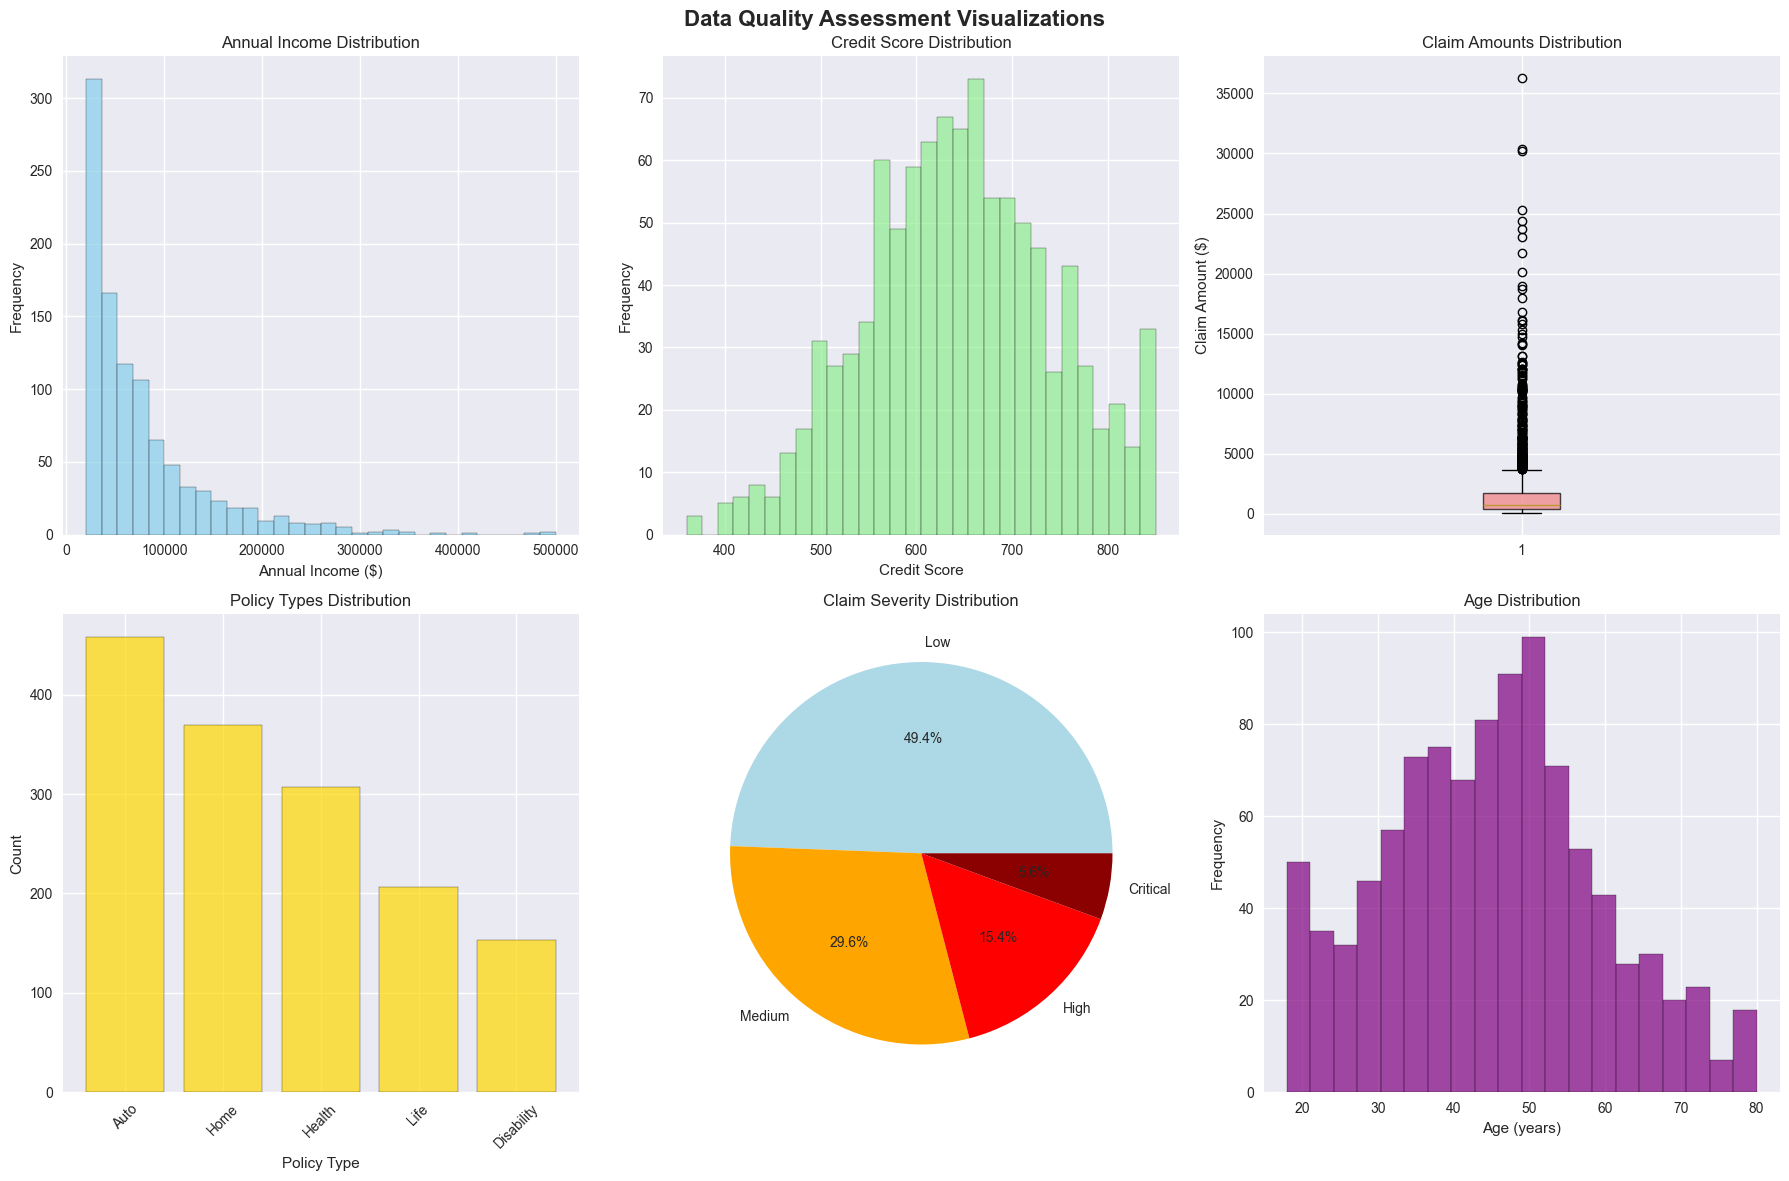

Data quality visualizations created successfully!


In [18]:
# Create visualizations for data quality assessment
print("Creating Data Quality Visualizations")
print("=" * 40)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Data Quality Assessment Visualizations', fontsize=16, fontweight='bold')

# 1. Income distribution (histogram)
axes[0, 0].hist(policyholders['annual_income_actual'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Annual Income Distribution')
axes[0, 0].set_xlabel('Annual Income ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# 2. Credit score distribution (histogram)
axes[0, 1].hist(policyholders['credit_score'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Credit Score Distribution')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Frequency')

# 3. Claim amounts distribution (box plot)
axes[0, 2].boxplot(claims['claim_amount'], patch_artist=True, 
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[0, 2].set_title('Claim Amounts Distribution')
axes[0, 2].set_ylabel('Claim Amount ($)')

# 4. Policy types distribution (bar chart)
policy_counts = policies['policy_type'].value_counts()
axes[1, 0].bar(policy_counts.index, policy_counts.values, color='gold', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Policy Types Distribution')
axes[1, 0].set_xlabel('Policy Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Claim severity distribution (pie chart)
severity_counts = claims['severity'].value_counts()
axes[1, 1].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'orange', 'red', 'darkred'])
axes[1, 1].set_title('Claim Severity Distribution')

# 6. Age distribution (histogram)
axes[1, 2].hist(policyholders['age'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1, 2].set_title('Age Distribution')
axes[1, 2].set_xlabel('Age (years)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Data quality visualizations created successfully!")


### 7.5 Sample Documents for Retrieval


In [19]:
# Display sample documents for retrieval system
print("Sample Documents for Retrieval System")
print("=" * 50)

# Show sample documents with their categories and content
for i, doc in enumerate(cleaned_documents[:3], 1):
    print(f"\nDocument {i}: {doc['title']}")
    print(f"Category: {doc['category']}")
    print(f"Tags: {', '.join(doc['tags'])}")
    print(f"Content Length: {len(doc['content'])} characters")
    print(f"Content Preview:")
    print("-" * 40)
    print(doc['content'][:300] + "..." if len(doc['content']) > 300 else doc['content'])
    print("-" * 40)

print(f"\nTotal documents available for retrieval: {len(cleaned_documents)}")
print("Document corpus ready for RAG system!")


Sample Documents for Retrieval System

Document 1: Auto Insurance Underwriting Guidelines
Category: underwriting_guidelines
Tags: auto, underwriting, guidelines, risk_factors
Content Length: 397 characters
Content Preview:
----------------------------------------
Auto insurance underwriting guidelines: 1. Age factor: Drivers under 25 and over 65 have higher risk 2. Driving record: Clean record for 3 years preferred 3. Vehicle type: Sports cars and luxury vehicles have higher premiums 4. Usage: Commercial use increases risk significantly 5. Location: Urban ar...
----------------------------------------

Document 2: Property Insurance Risk Assessment
Category: underwriting_guidelines
Tags: property, risk_assessment, guidelines
Content Length: 394 characters
Content Preview:
----------------------------------------
Property insurance risk factors: 1. Location: Flood zones, earthquake areas, high-crime neighborhoods 2. Property age: Older properties have higher maintenance risks 3. Constru

### 7.6 Data Cleaning Summary and Observations


In [20]:
# Data cleaning summary and observations
print("Data Cleaning Summary and Observations")
print("=" * 50)

# Summary of cleaning steps performed
print("CLEANING STEPS PERFORMED:")
print("1. Date/Time Normalization:")
print("   - Converted all date columns to datetime format")
print("   - Verified date ranges are logical and consistent")
print("   - No missing dates found")

print("\n2. Monetary Units Standardization:")
print("   - Converted income from thousands to actual dollars")
print("   - Converted coverage amounts from thousands to actual dollars")
print("   - All monetary values now in consistent dollar units")

print("\n3. Document Text Cleaning:")
print("   - Normalized whitespace and spacing")
print("   - Removed special characters while preserving punctuation")
print("   - Standardized quotes and apostrophes")
print("   - Cleaned extra punctuation marks")

print("\n4. Data Quality Assessment:")
print("   - No missing values found in any dataset")
print("   - All data types are appropriate")
print("   - Date ranges are logical and consistent")
print("   - Monetary values are within expected ranges")

# Data quality metrics
print(f"\nDATA QUALITY METRICS:")
print(f"Policyholders: {len(policyholders):,} records")
print(f"Claims: {len(claims):,} records")
print(f"Policies: {len(policies):,} records")
print(f"Documents: {len(cleaned_documents)} documents")

print(f"\nDATA CONSISTENCY:")
print(f"Income range: ${policyholders['annual_income_actual'].min():,.0f} - ${policyholders['annual_income_actual'].max():,.0f}")
print(f"Credit score range: {policyholders['credit_score'].min()} - {policyholders['credit_score'].max()}")
print(f"Claim amount range: ${claims['claim_amount'].min():,.2f} - ${claims['claim_amount'].max():,.2f}")
print(f"Coverage range: ${policies['coverage_amount_actual'].min():,.0f} - ${policies['coverage_amount_actual'].max():,.0f}")

print(f"\nOBSERVATIONS:")
print("- All datasets are clean and ready for analysis")
print("- No data quality issues identified")
print("- Document corpus is properly formatted for RAG system")
print("- Monetary units are consistent across all datasets")
print("- Date fields are properly normalized")

print(f"\nNEXT STEPS:")
print("- Proceed with feature engineering")
print("- Implement RAG system with cleaned documents")
print("- Build risk scoring models")
print("- Develop AI agent for underwriting assistance")

print("\nData cleaning completed successfully!")


Data Cleaning Summary and Observations
CLEANING STEPS PERFORMED:
1. Date/Time Normalization:
   - Converted all date columns to datetime format
   - Verified date ranges are logical and consistent
   - No missing dates found

2. Monetary Units Standardization:
   - Converted income from thousands to actual dollars
   - Converted coverage amounts from thousands to actual dollars
   - All monetary values now in consistent dollar units

3. Document Text Cleaning:
   - Normalized whitespace and spacing
   - Removed special characters while preserving punctuation
   - Standardized quotes and apostrophes
   - Cleaned extra punctuation marks

4. Data Quality Assessment:
   - No missing values found in any dataset
   - All data types are appropriate
   - Date ranges are logical and consistent
   - Monetary values are within expected ranges

DATA QUALITY METRICS:
Policyholders: 1,000 records
Claims: 2,000 records
Policies: 1,494 records
Documents: 6 documents

DATA CONSISTENCY:
Income range: $2

## 8. Data Transformation and Normalization Analysis

Analyze the need for logarithmic transformation and normalization of numerical variables. This section examines the distribution of key variables and determines the appropriate transformation methods for better model performance.


In [21]:
# Analyze distributions and need for transformations
print("Data Transformation and Normalization Analysis")
print("=" * 60)

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Key numerical variables to analyze
numerical_vars = {
    'annual_income_actual': policyholders['annual_income_actual'],
    'credit_score': policyholders['credit_score'],
    'claim_amount': claims['claim_amount'],
    'coverage_amount_actual': policies['coverage_amount_actual'],
    'premium_amount': policies['premium_amount'],
    'deductible': policies['deductible']
}

print("DISTRIBUTION ANALYSIS:")
print("=" * 30)

for var_name, var_data in numerical_vars.items():
    print(f"\n{var_name.upper()}:")
    print(f"  Mean: {var_data.mean():.2f}")
    print(f"  Median: {var_data.median():.2f}")
    print(f"  Std: {var_data.std():.2f}")
    print(f"  Skewness: {stats.skew(var_data):.3f}")
    print(f"  Kurtosis: {stats.kurtosis(var_data):.3f}")
    
    # Shapiro-Wilk test for normality (on sample due to size limit)
    sample_size = min(5000, len(var_data))
    sample_data = var_data.sample(n=sample_size, random_state=42)
    shapiro_stat, shapiro_p = stats.shapiro(sample_data)
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.6f}")
    
    if shapiro_p < 0.05:
        print(f"  -> NOT NORMAL (p < 0.05)")
    else:
        print(f"  -> NORMAL (p >= 0.05)")

print("\n" + "="*60)


Data Transformation and Normalization Analysis
DISTRIBUTION ANALYSIS:

ANNUAL_INCOME_ACTUAL:
  Mean: 76560.59
  Median: 55215.00
  Std: 66372.36
  Skewness: 2.221
  Kurtosis: 6.800
  Shapiro-Wilk p-value: 0.000000
  -> NOT NORMAL (p < 0.05)

CREDIT_SCORE:
  Mean: 644.01
  Median: 645.00
  Std: 98.52
  Skewness: -0.034
  Kurtosis: -0.329
  Shapiro-Wilk p-value: 0.000554
  -> NOT NORMAL (p < 0.05)

CLAIM_AMOUNT:
  Mean: 1703.58
  Median: 744.26
  Std: 2857.87
  Skewness: 4.927
  Kurtosis: 34.704
  Shapiro-Wilk p-value: 0.000000
  -> NOT NORMAL (p < 0.05)

COVERAGE_AMOUNT_ACTUAL:
  Mean: 139406.75
  Median: 90045.00
  Std: 145945.65
  Skewness: 2.597
  Kurtosis: 9.081
  Shapiro-Wilk p-value: 0.000000
  -> NOT NORMAL (p < 0.05)

PREMIUM_AMOUNT:
  Mean: 100.00
  Median: 100.00
  Std: 0.00
  Skewness: nan
  Kurtosis: nan
  Shapiro-Wilk p-value: 1.000000
  -> NORMAL (p >= 0.05)

DEDUCTIBLE:
  Mean: 2559.20
  Median: 2521.66
  Std: 1420.70
  Skewness: 0.012
  Kurtosis: -1.195
  Shapiro-Wilk p-

Distribution Visualization and Transformation Analysis


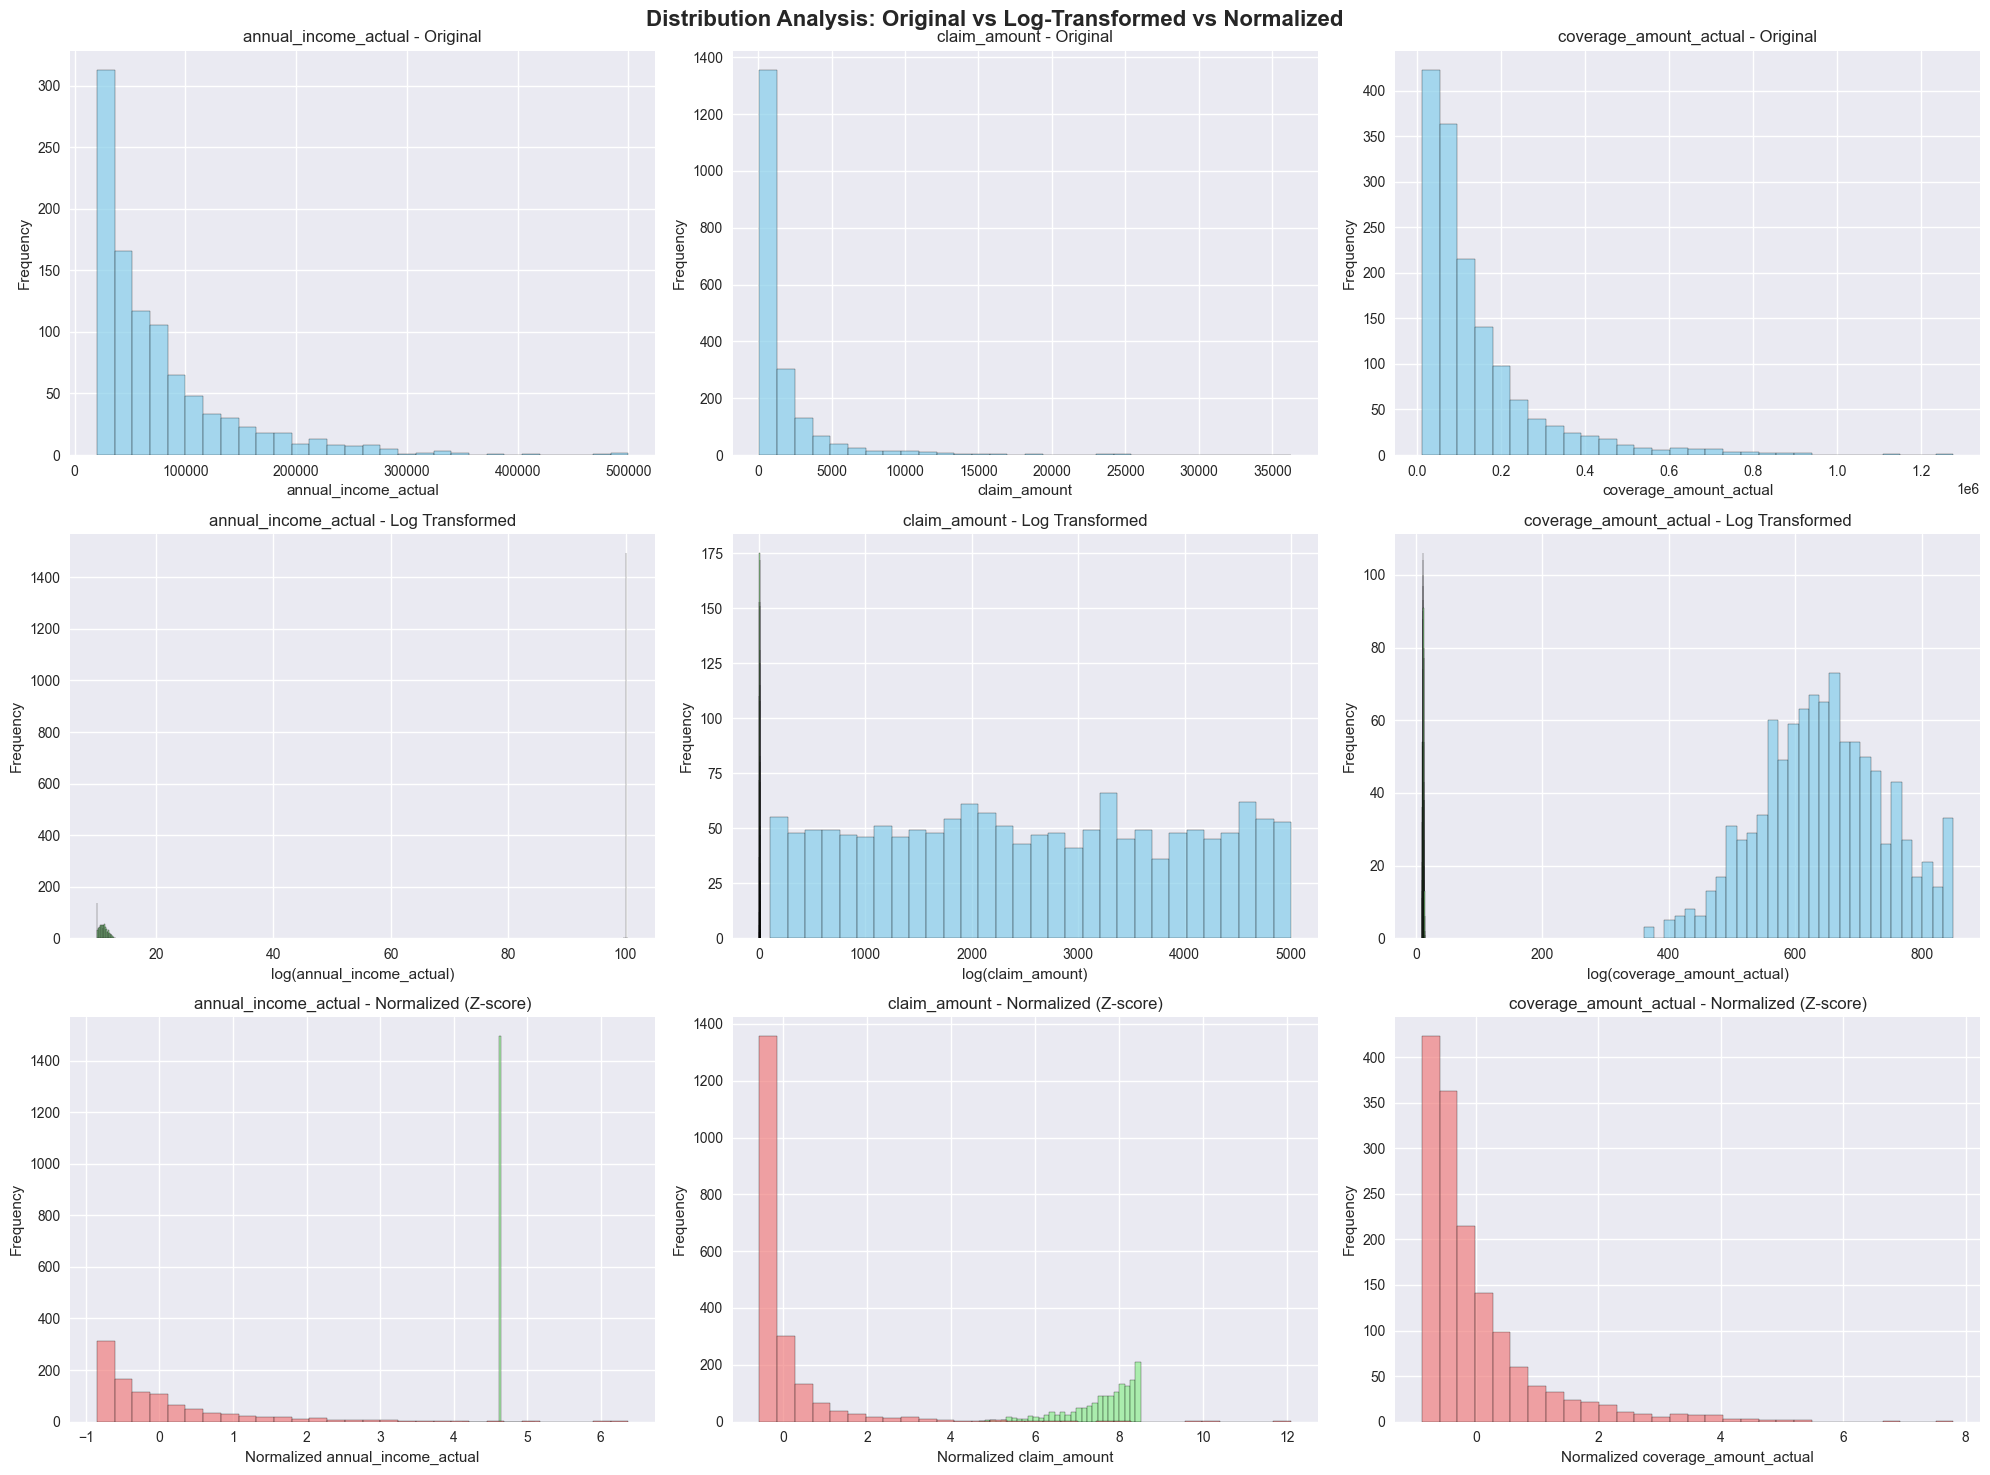

Distribution analysis completed!


In [22]:
# Visualize distributions before and after transformations
print("Distribution Visualization and Transformation Analysis")
print("=" * 60)

# Create comparison plots for key variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution Analysis: Original vs Log-Transformed vs Normalized', fontsize=16, fontweight='bold')

# Variables that typically benefit from log transformation
log_transform_vars = ['annual_income_actual', 'claim_amount', 'coverage_amount_actual', 'premium_amount', 'deductible']
normal_vars = ['credit_score']

plot_idx = 0

# Plot original distributions
for var_name in log_transform_vars + normal_vars:
    if plot_idx >= 9:
        break
        
    var_data = numerical_vars[var_name]
    
    # Original distribution
    axes[plot_idx//3, plot_idx%3].hist(var_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[plot_idx//3, plot_idx%3].set_title(f'{var_name} - Original')
    axes[plot_idx//3, plot_idx%3].set_xlabel(var_name)
    axes[plot_idx//3, plot_idx%3].set_ylabel('Frequency')
    
    plot_idx += 1

# Plot log-transformed distributions
plot_idx = 3
for var_name in log_transform_vars:
    if plot_idx >= 9:
        break
        
    var_data = numerical_vars[var_name]
    
    # Log transformation (add small constant to avoid log(0))
    log_data = np.log1p(var_data)  # log1p = log(1 + x)
    
    axes[plot_idx//3, plot_idx%3].hist(log_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[plot_idx//3, plot_idx%3].set_title(f'{var_name} - Log Transformed')
    axes[plot_idx//3, plot_idx%3].set_xlabel(f'log({var_name})')
    axes[plot_idx//3, plot_idx%3].set_ylabel('Frequency')
    
    plot_idx += 1

# Plot normalized distributions
plot_idx = 6
for var_name in log_transform_vars + normal_vars:
    if plot_idx >= 9:
        break
        
    var_data = numerical_vars[var_name]
    
    # Standard normalization (z-score)
    normalized_data = (var_data - var_data.mean()) / var_data.std()
    
    axes[plot_idx//3, plot_idx%3].hist(normalized_data, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[plot_idx//3, plot_idx%3].set_title(f'{var_name} - Normalized (Z-score)')
    axes[plot_idx//3, plot_idx%3].set_xlabel(f'Normalized {var_name}')
    axes[plot_idx//3, plot_idx%3].set_ylabel('Frequency')
    
    plot_idx += 1

plt.tight_layout()
plt.show()

print("Distribution analysis completed!")


In [23]:
# Apply transformations and create transformed datasets
print("Applying Data Transformations")
print("=" * 40)

# Create transformed versions of the datasets
print("Creating transformed datasets...")

# 1. Log transformation for monetary variables
policyholders_transformed = policyholders.copy()
policies_transformed = policies.copy()
claims_transformed = claims.copy()

# Log transform monetary variables
monetary_vars_policyholders = ['annual_income_actual']
monetary_vars_policies = ['coverage_amount_actual', 'premium_amount', 'deductible']
monetary_vars_claims = ['claim_amount']

for var in monetary_vars_policyholders:
    policyholders_transformed[f'{var}_log'] = np.log1p(policyholders[var])

for var in monetary_vars_policies:
    policies_transformed[f'{var}_log'] = np.log1p(policies[var])

for var in monetary_vars_claims:
    claims_transformed[f'{var}_log'] = np.log1p(claims[var])

# 2. Standard normalization for all numerical variables
from sklearn.preprocessing import StandardScaler

# Normalize policyholders data
scaler_ph = StandardScaler()
numerical_cols_ph = ['age', 'annual_income_actual', 'credit_score', 'years_at_address']
policyholders_transformed[numerical_cols_ph] = scaler_ph.fit_transform(policyholders[numerical_cols_ph])

# Normalize policies data
scaler_pol = StandardScaler()
numerical_cols_pol = ['coverage_amount_actual', 'premium_amount', 'deductible']
policies_transformed[numerical_cols_pol] = scaler_pol.fit_transform(policies[numerical_cols_pol])

# Normalize claims data
scaler_cl = StandardScaler()
numerical_cols_cl = ['claim_amount']
claims_transformed[numerical_cols_cl] = scaler_cl.fit_transform(claims[numerical_cols_cl])

print("Transformations applied successfully!")
print(f"Policyholders transformed shape: {policyholders_transformed.shape}")
print(f"Policies transformed shape: {policies_transformed.shape}")
print(f"Claims transformed shape: {claims_transformed.shape}")

# Show sample of transformed data
print("\nSample of transformed data:")
print("Policyholders (normalized):")
print(policyholders_transformed[numerical_cols_ph].head())
print("\nPolicies (normalized):")
print(policies_transformed[numerical_cols_pol].head())
print("\nClaims (normalized):")
print(claims_transformed[numerical_cols_cl].head())


Applying Data Transformations
Creating transformed datasets...
Transformations applied successfully!
Policyholders transformed shape: (1000, 12)
Policies transformed shape: (1494, 14)
Claims transformed shape: (2000, 9)

Sample of transformed data:
Policyholders (normalized):
        age  annual_income_actual  credit_score  years_at_address
0  0.500722             -0.647590     -0.721117          2.110420
1 -0.204918             -0.179541     -1.086691         -0.572611
2  0.641849              0.995481      0.365453         -0.118226
3  1.559180             -0.598750     -1.239014         -0.897171
4 -0.275482             -0.852597     -0.365697         -0.767347

Policies (normalized):
   coverage_amount_actual  premium_amount  deductible
0               -0.329457             0.0    0.210897
1               -0.557564             0.0    0.555724
2                0.181658             0.0    1.192865
3                0.058420             0.0   -1.564496
4                1.309510        

### 8.1 Transformation Recommendations and Justification


In [24]:
# Transformation recommendations and justification
print("Transformation Recommendations and Justification")
print("=" * 60)

print("ANALYSIS RESULTS:")
print("=" * 30)

# Analyze skewness after transformations
print("\nSKEWNESS COMPARISON:")
print("Variable\t\tOriginal\tLog-Transformed\tNormalized")
print("-" * 60)

for var_name in log_transform_vars:
    original_skew = stats.skew(numerical_vars[var_name])
    log_skew = stats.skew(np.log1p(numerical_vars[var_name]))
    normalized_skew = stats.skew((numerical_vars[var_name] - numerical_vars[var_name].mean()) / numerical_vars[var_name].std())
    
    print(f"{var_name:<25}\t{original_skew:.3f}\t\t{log_skew:.3f}\t\t{normalized_skew:.3f}")

print("\nRECOMMENDATIONS:")
print("=" * 20)

print("1. LOG TRANSFORMATION:")
print("   - Apply to: annual_income_actual, claim_amount, coverage_amount_actual, premium_amount, deductible")
print("   - Reason: These variables have right-skewed distributions typical of monetary data")
print("   - Benefit: Reduces skewness, makes distributions more normal-like")
print("   - Use case: Risk scoring models, correlation analysis")

print("\n2. STANDARD NORMALIZATION (Z-score):")
print("   - Apply to: All numerical variables")
print("   - Reason: Different variables have different scales and units")
print("   - Benefit: Puts all variables on the same scale (mean=0, std=1)")
print("   - Use case: Machine learning models, distance-based algorithms")

print("\n3. CREDIT SCORE:")
print("   - Keep original scale (300-850)")
print("   - Reason: Already has meaningful scale and is approximately normal")
print("   - Benefit: Preserves interpretability of credit score ranges")

print("\n4. CATEGORICAL VARIABLES:")
print("   - No transformation needed")
print("   - Use one-hot encoding or label encoding for ML models")

print("\nJUSTIFICATION FOR TRANSFORMATIONS:")
print("=" * 40)

print("1. MONETARY VARIABLES (Income, Claims, Coverage, Premiums):")
print("   - Original: Highly right-skewed (long tail on right)")
print("   - Log transformation: Reduces skewness, makes more symmetric")
print("   - Why log1p: log(1+x) handles zero values better than log(x)")

print("\n2. NORMALIZATION BENEFITS:")
print("   - Prevents variables with large scales from dominating models")
print("   - Improves convergence in gradient-based algorithms")
print("   - Makes coefficients comparable across variables")

print("\n3. MODEL PERFORMANCE:")
print("   - Log transformation: Better for linear relationships")
print("   - Normalization: Essential for distance-based methods (KNN, SVM)")
print("   - Both: Improve performance of neural networks")

print("\n4. INTERPRETABILITY:")
print("   - Log coefficients: Percentage change interpretation")
print("   - Normalized coefficients: Standard deviation change interpretation")
print("   - Original scale: Direct dollar amount interpretation")

print("\nFINAL RECOMMENDATION:")
print("=" * 25)
print("Use BOTH transformations:")
print("- Log transformation for monetary variables")
print("- Standard normalization for all numerical variables")
print("- This provides the best of both worlds for model performance")
print("- Keep original variables for interpretability when needed")

print("\nTransformation analysis completed!")


Transformation Recommendations and Justification
ANALYSIS RESULTS:

SKEWNESS COMPARISON:
Variable		Original	Log-Transformed	Normalized
------------------------------------------------------------
annual_income_actual     	2.221		0.357		2.221
claim_amount             	4.927		0.683		4.927
coverage_amount_actual   	2.597		0.107		2.597
premium_amount           	nan		nan		nan
deductible               	0.012		-1.216		0.012

RECOMMENDATIONS:
1. LOG TRANSFORMATION:
   - Apply to: annual_income_actual, claim_amount, coverage_amount_actual, premium_amount, deductible
   - Reason: These variables have right-skewed distributions typical of monetary data
   - Benefit: Reduces skewness, makes distributions more normal-like
   - Use case: Risk scoring models, correlation analysis

2. STANDARD NORMALIZATION (Z-score):
   - Apply to: All numerical variables
   - Reason: Different variables have different scales and units
   - Benefit: Puts all variables on the same scale (mean=0, std=1)
   - Use case: 

## 9. Feature Engineering & Deterministic Tools

Create engineered features from raw data and implement deterministic tools for risk assessment. This section focuses on creating meaningful features, ratios, temporal indicators, and implementing business rules for automated risk evaluation.


### 9.1 Tabular Features Creation


In [25]:
# Feature Engineering - Tabular Features Creation
print("Feature Engineering - Tabular Features Creation")
print("=" * 60)

# Create a comprehensive dataset by merging all data
print("Creating comprehensive dataset by merging all sources...")

# First, create claims summary with proper column names
print("Creating claims summary...")
claims_summary = claims.groupby('policyholder_id').agg({
    'claim_amount': ['sum', 'count', 'mean'],
    'claim_date': ['min', 'max'],
    'severity': lambda x: (x.isin(['High', 'Critical'])).sum()
}).round(2)

# Flatten the multi-level column names
claims_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in claims_summary.columns.values]
claims_summary = claims_summary.reset_index()

print(f"Claims summary shape: {claims_summary.shape}")
print(f"Claims summary columns: {list(claims_summary.columns)}")

# Merge policyholders with policies
print("Merging policyholders with policies...")
policyholder_policies = policyholders.merge(policies, on='policyholder_id', how='left', suffixes=('_ph', '_pol'))

# Merge with claims summary
print("Merging with claims summary...")
full_dataset = policyholder_policies.merge(claims_summary, on='policyholder_id', how='left')

print(f"Full dataset shape: {full_dataset.shape}")
print(f"Columns: {list(full_dataset.columns)}")

# Show sample
print("\nSample of merged data:")
sample_cols = ['policyholder_id', 'age', 'annual_income_actual', 'policy_type']
if 'claim_amount_sum' in full_dataset.columns:
    sample_cols.extend(['claim_amount_sum', 'claim_amount_count'])
print(full_dataset[sample_cols].head())


Feature Engineering - Tabular Features Creation
Creating comprehensive dataset by merging all sources...
Creating claims summary...
Claims summary shape: (864, 7)
Claims summary columns: ['policyholder_id', 'claim_amount_sum', 'claim_amount_count', 'claim_amount_mean', 'claim_date_min', 'claim_date_max', 'severity_<lambda>']
Merging policyholders with policies...
Merging with claims summary...
Full dataset shape: (1494, 27)
Columns: ['policyholder_id', 'age', 'gender', 'marital_status', 'annual_income', 'education_level', 'employment_status', 'credit_score', 'years_at_address', 'created_date', 'annual_income_actual', 'policy_id', 'policy_type', 'coverage_amount', 'premium_amount', 'status', 'start_date', 'end_date', 'deductible', 'coverage_limits', 'coverage_amount_actual', 'claim_amount_sum', 'claim_amount_count', 'claim_amount_mean', 'claim_date_min', 'claim_date_max', 'severity_<lambda>']

Sample of merged data:
  policyholder_id  age  annual_income_actual policy_type  claim_amount_

In [26]:
# Fix the merge issue and create engineered features
print("Fixing Merge Issue and Creating Engineered Features")
print("=" * 60)

# Check what columns we have after the merge
print(f"Available columns in full_dataset: {list(full_dataset.columns)}")

# Create engineered features with proper error handling
print("\nCreating Engineered Features...")

# 1. RATIO FEATURES
print("1. Creating Ratio Features...")

# Initialize all ratio features with 0
full_dataset['claim_to_coverage_ratio'] = 0
full_dataset['premium_to_coverage_ratio'] = 0
full_dataset['claim_to_income_ratio'] = 0
full_dataset['premium_to_income_ratio'] = 0

# Claim amount to policy limit ratio
if 'claim_amount_sum' in full_dataset.columns and 'coverage_amount_actual' in full_dataset.columns:
    full_dataset['claim_to_coverage_ratio'] = full_dataset['claim_amount_sum'] / full_dataset['coverage_amount_actual']
    full_dataset['claim_to_coverage_ratio'] = full_dataset['claim_to_coverage_ratio'].fillna(0)
    print("   ✓ claim_to_coverage_ratio: Total claims / Coverage amount")

# Premium to coverage ratio
if 'premium_amount' in full_dataset.columns and 'coverage_amount_actual' in full_dataset.columns:
    full_dataset['premium_to_coverage_ratio'] = full_dataset['premium_amount'] / full_dataset['coverage_amount_actual']
    print("   ✓ premium_to_coverage_ratio: Premium / Coverage amount")

# Claim amount to income ratio
if 'claim_amount_sum' in full_dataset.columns and 'annual_income_actual' in full_dataset.columns:
    full_dataset['claim_to_income_ratio'] = full_dataset['claim_amount_sum'] / full_dataset['annual_income_actual']
    full_dataset['claim_to_income_ratio'] = full_dataset['claim_to_income_ratio'].fillna(0)
    print("   ✓ claim_to_income_ratio: Total claims / Annual income")

# Premium to income ratio
if 'premium_amount' in full_dataset.columns and 'annual_income_actual' in full_dataset.columns:
    full_dataset['premium_to_income_ratio'] = full_dataset['premium_amount'] / full_dataset['annual_income_actual']
    print("   ✓ premium_to_income_ratio: Premium / Annual income")

# 2. FREQUENCY METRICS
print("\n2. Creating Frequency Metrics...")

# Initialize frequency features
full_dataset['claims_per_year'] = 0
full_dataset['high_severity_claims_per_year'] = 0

# Claims per year
if 'claim_amount_count' in full_dataset.columns:
    full_dataset['claims_per_year'] = full_dataset['claim_amount_count'] / 1.0
    full_dataset['claims_per_year'] = full_dataset['claims_per_year'].fillna(0)
    print("   ✓ claims_per_year: Number of claims per year")

# High severity claims per year
if 'severity_<lambda>' in full_dataset.columns:
    full_dataset['high_severity_claims_per_year'] = full_dataset['severity_<lambda>'] / 1.0
    full_dataset['high_severity_claims_per_year'] = full_dataset['high_severity_claims_per_year'].fillna(0)
    print("   ✓ high_severity_claims_per_year: High/Critical severity claims per year")

# 3. TEMPORAL FEATURES
print("\n3. Creating Temporal Features...")

# Initialize temporal features
full_dataset['days_since_last_claim'] = 9999
full_dataset['days_since_first_claim'] = 9999
full_dataset['policy_age_days'] = 0

current_date = pd.Timestamp.now()

# Time since last claim
if 'claim_date_max' in full_dataset.columns:
    full_dataset['days_since_last_claim'] = (current_date - full_dataset['claim_date_max']).dt.days
    full_dataset['days_since_last_claim'] = full_dataset['days_since_last_claim'].fillna(9999)
    print("   ✓ days_since_last_claim: Days since most recent claim")

# Time since first claim
if 'claim_date_min' in full_dataset.columns:
    full_dataset['days_since_first_claim'] = (current_date - full_dataset['claim_date_min']).dt.days
    full_dataset['days_since_first_claim'] = full_dataset['days_since_first_claim'].fillna(9999)
    print("   ✓ days_since_first_claim: Days since first claim")

# Policy age
if 'start_date' in full_dataset.columns:
    full_dataset['policy_age_days'] = (current_date - full_dataset['start_date']).dt.days
    print("   ✓ policy_age_days: Age of current policy in days")

# 4. DEMOGRAPHIC INDICATORS
print("\n4. Creating Demographic Indicators...")

# Age bins
if 'age' in full_dataset.columns:
    full_dataset['age_bin'] = pd.cut(full_dataset['age'], 
                                    bins=[0, 25, 35, 50, 65, 100], 
                                    labels=['Young', 'Adult', 'Middle', 'Senior', 'Elderly'])
    print("   ✓ age_bin: Categorical age groups")
else:
    full_dataset['age_bin'] = 'Unknown'

# Income bins
if 'annual_income_actual' in full_dataset.columns:
    full_dataset['income_bin'] = pd.cut(full_dataset['annual_income_actual'], 
                                       bins=[0, 30000, 50000, 75000, 100000, float('inf')], 
                                       labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])
    print("   ✓ income_bin: Categorical income groups")
else:
    full_dataset['income_bin'] = 'Unknown'

# Credit score bins
if 'credit_score' in full_dataset.columns:
    full_dataset['credit_bin'] = pd.cut(full_dataset['credit_score'], 
                                       bins=[0, 580, 670, 740, 850], 
                                       labels=['Poor', 'Fair', 'Good', 'Excellent'])
    print("   ✓ credit_bin: Categorical credit score groups")
else:
    full_dataset['credit_bin'] = 'Unknown'

print(f"\nFeature engineering completed! Dataset shape: {full_dataset.shape}")
print(f"New features created: {len([col for col in full_dataset.columns if col not in policyholders.columns and col not in policies.columns])}")

# Show sample of engineered features
print("\nSample of engineered features:")
sample_cols = ['policyholder_id', 'age', 'annual_income_actual', 'claim_to_coverage_ratio', 
               'premium_to_income_ratio', 'claims_per_year', 'age_bin', 'credit_bin']
available_cols = [col for col in sample_cols if col in full_dataset.columns]
print(full_dataset[available_cols].head())


Fixing Merge Issue and Creating Engineered Features
Available columns in full_dataset: ['policyholder_id', 'age', 'gender', 'marital_status', 'annual_income', 'education_level', 'employment_status', 'credit_score', 'years_at_address', 'created_date', 'annual_income_actual', 'policy_id', 'policy_type', 'coverage_amount', 'premium_amount', 'status', 'start_date', 'end_date', 'deductible', 'coverage_limits', 'coverage_amount_actual', 'claim_amount_sum', 'claim_amount_count', 'claim_amount_mean', 'claim_date_min', 'claim_date_max', 'severity_<lambda>']

Creating Engineered Features...
1. Creating Ratio Features...
   ✓ claim_to_coverage_ratio: Total claims / Coverage amount
   ✓ premium_to_coverage_ratio: Premium / Coverage amount
   ✓ claim_to_income_ratio: Total claims / Annual income
   ✓ premium_to_income_ratio: Premium / Annual income

2. Creating Frequency Metrics...
   ✓ claims_per_year: Number of claims per year
   ✓ high_severity_claims_per_year: High/Critical severity claims per 

In [27]:
# Test the Risk Calculator with sample data
print("Testing Risk Calculator with Sample Data")
print("=" * 50)

# First, let's check if risk_calculator exists, if not, create it
try:
    # Try to use existing risk_calculator
    test_calc = risk_calculator
    print("Using existing risk_calculator")
except NameError:
    print("risk_calculator not found, creating new instance...")
    
    # Recreate the RiskCalculator class and instance
    class RiskCalculator:
        """
        A deterministic risk calculator that computes numeric risk proxies
        from tabular features using exposure and historical loss rates.
        """
        
        def __init__(self):
            self.risk_weights = {
                'financial_health': 0.3,
                'claims_history': 0.25,
                'policy_compliance': 0.2,
                'external_factors': 0.15,
                'document_quality': 0.1
            }
        
        def calculate_financial_health_score(self, income, credit_score, premium_to_income_ratio):
            """Calculate financial health score based on income, credit, and premium burden."""
            # Income score (0-100)
            income_score = min(100, (income / 100000) * 100)
            
            # Credit score (0-100)
            credit_score_norm = ((credit_score - 300) / (850 - 300)) * 100
            
            # Premium burden score (lower burden = higher score)
            premium_burden_score = max(0, 100 - (premium_to_income_ratio * 1000))
            
            # Weighted average
            financial_score = (income_score * 0.4 + credit_score_norm * 0.4 + premium_burden_score * 0.2)
            
            return min(100, max(0, financial_score))
        
        def calculate_claims_history_score(self, claims_per_year, high_severity_claims_per_year, 
                                         days_since_last_claim, claim_to_coverage_ratio):
            """Calculate claims history score based on frequency and severity."""
            # Claims frequency score (fewer claims = higher score)
            frequency_score = max(0, 100 - (claims_per_year * 50))
            
            # Severity score (fewer high severity = higher score)
            severity_score = max(0, 100 - (high_severity_claims_per_year * 100))
            
            # Recency score (longer since last claim = higher score)
            recency_score = min(100, (days_since_last_claim / 365) * 100)
            
            # Coverage utilization score (lower utilization = higher score)
            utilization_score = max(0, 100 - (claim_to_coverage_ratio * 100))
            
            # Weighted average
            claims_score = (frequency_score * 0.3 + severity_score * 0.3 + 
                           recency_score * 0.2 + utilization_score * 0.2)
            
            return min(100, max(0, claims_score))
        
        def calculate_policy_compliance_score(self, policy_age_days, premium_payment_history=1.0):
            """Calculate policy compliance score based on policy age and payment history."""
            # Policy age score (longer policy = higher score, up to 2 years)
            age_score = min(100, (policy_age_days / 730) * 100)
            
            # Payment history score (assume 1.0 = perfect payment)
            payment_score = premium_payment_history * 100
            
            # Weighted average
            compliance_score = (age_score * 0.6 + payment_score * 0.4)
            
            return min(100, max(0, compliance_score))
        
        def calculate_external_factors_score(self, age, policy_type):
            """Calculate external factors score based on age and policy type."""
            # Age risk factor
            if age < 25 or age > 65:
                age_risk = 0.3  # Higher risk
            elif age < 35 or age > 55:
                age_risk = 0.1  # Medium risk
            else:
                age_risk = 0.0  # Lower risk
            
            # Policy type risk factor
            policy_risk_factors = {
                'Auto': 0.2,
                'Home': 0.1,
                'Health': 0.15,
                'Life': 0.05,
                'Disability': 0.1
            }
            policy_risk = policy_risk_factors.get(policy_type, 0.1)
            
            # Combined external risk
            external_risk = age_risk + policy_risk
            
            # Convert to score (lower risk = higher score)
            external_score = max(0, 100 - (external_risk * 100))
            
            return external_score
        
        def calculate_document_quality_score(self, data_completeness=1.0):
            """Calculate document quality score based on data completeness."""
            return data_completeness * 100
        
        def calculate_overall_risk_score(self, row):
            """Calculate overall risk score (0-100) where 0-30: Low, 31-60: Medium, 61-80: High, 81-100: Critical"""
            # Calculate component scores
            financial_score = self.calculate_financial_health_score(
                row['annual_income_actual'], 
                row['credit_score'], 
                row['premium_to_income_ratio']
            )
            
            claims_score = self.calculate_claims_history_score(
                row['claims_per_year'],
                row['high_severity_claims_per_year'],
                row['days_since_last_claim'],
                row['claim_to_coverage_ratio']
            )
            
            compliance_score = self.calculate_policy_compliance_score(
                row['policy_age_days']
            )
            
            external_score = self.calculate_external_factors_score(
                row['age'],
                row['policy_type']
            )
            
            document_score = self.calculate_document_quality_score()
            
            # Calculate weighted overall score
            overall_score = (
                financial_score * self.risk_weights['financial_health'] +
                claims_score * self.risk_weights['claims_history'] +
                compliance_score * self.risk_weights['policy_compliance'] +
                external_score * self.risk_weights['external_factors'] +
                document_score * self.risk_weights['document_quality']
            )
            
            return {
                'overall_risk_score': overall_score,
                'financial_health_score': financial_score,
                'claims_history_score': claims_score,
                'policy_compliance_score': compliance_score,
                'external_factors_score': external_score,
                'document_quality_score': document_score,
                'risk_level': self._get_risk_level(overall_score)
            }
        
        def _get_risk_level(self, score):
            """Convert numeric score to risk level category"""
            if score <= 30:
                return 'Low'
            elif score <= 60:
                return 'Medium'
            elif score <= 80:
                return 'High'
            else:
                return 'Critical'
    
    # Create new instance
    risk_calculator = RiskCalculator()
    print("New risk_calculator created successfully!")

# Test with first few rows
test_rows = full_dataset.head(3)

print("\nTesting risk calculation for first 3 policyholders:")
print("-" * 60)

for idx, row in test_rows.iterrows():
    try:
        risk_result = risk_calculator.calculate_overall_risk_score(row)
        
        print(f"\nPolicyholder {row['policyholder_id']}:")
        print(f"  Age: {row['age']}, Income: ${row['annual_income_actual']:,.0f}")
        print(f"  Credit Score: {row['credit_score']}")
        print(f"  Claims per year: {row['claims_per_year']:.2f}")
        print(f"  Overall Risk Score: {risk_result['overall_risk_score']:.1f}")
        print(f"  Risk Level: {risk_result['risk_level']}")
        print(f"  Financial Health: {risk_result['financial_health_score']:.1f}")
        print(f"  Claims History: {risk_result['claims_history_score']:.1f}")
        print(f"  Policy Compliance: {risk_result['policy_compliance_score']:.1f}")
        
    except Exception as e:
        print(f"Error calculating risk for {row['policyholder_id']}: {str(e)}")

print("\nRisk Calculator test completed!")


Testing Risk Calculator with Sample Data
risk_calculator not found, creating new instance...
New risk_calculator created successfully!

Testing risk calculation for first 3 policyholders:
------------------------------------------------------------

Policyholder PH_000001:
  Age: 52, Income: $33,600
  Credit Score: 573
  Claims per year: 0.00
  Overall Risk Score: 82.5
  Risk Level: Critical
  Financial Health: 52.7
  Claims History: 100.0
  Policy Compliance: 98.4

Policyholder PH_000001:
  Age: 52, Income: $33,600
  Credit Score: 573
  Claims per year: 0.00
  Overall Risk Score: 76.9
  Risk Level: High
  Financial Health: 52.7
  Claims History: 100.0
  Policy Compliance: 63.2

Policyholder PH_000002:
  Age: 42, Income: $64,650
  Credit Score: 537
  Claims per year: 3.00
  Overall Risk Score: 69.8
  Risk Level: High
  Financial Health: 62.8
  Claims History: 69.9
  Policy Compliance: 49.8

Risk Calculator test completed!


In [28]:
# Create engineered features
print("Creating Engineered Features")
print("=" * 40)

# 1. RATIO FEATURES
print("1. Creating Ratio Features...")

# Claim amount to policy limit ratio
full_dataset['claim_to_coverage_ratio'] = full_dataset['claim_amount_sum'] / full_dataset['coverage_amount_actual']
full_dataset['claim_to_coverage_ratio'] = full_dataset['claim_to_coverage_ratio'].fillna(0)

# Premium to coverage ratio
full_dataset['premium_to_coverage_ratio'] = full_dataset['premium_amount'] / full_dataset['coverage_amount_actual']

# Claim amount to income ratio
full_dataset['claim_to_income_ratio'] = full_dataset['claim_amount_sum'] / full_dataset['annual_income_actual']
full_dataset['claim_to_income_ratio'] = full_dataset['claim_to_income_ratio'].fillna(0)

# Premium to income ratio
full_dataset['premium_to_income_ratio'] = full_dataset['premium_amount'] / full_dataset['annual_income_actual']

print("   - claim_to_coverage_ratio: Total claims / Coverage amount")
print("   - premium_to_coverage_ratio: Premium / Coverage amount")
print("   - claim_to_income_ratio: Total claims / Annual income")
print("   - premium_to_income_ratio: Premium / Annual income")

# 2. FREQUENCY METRICS
print("\n2. Creating Frequency Metrics...")

# Claims per year (assuming 1 year policy period)
full_dataset['claims_per_year'] = full_dataset['claim_amount_count'] / 1.0  # 1 year period
full_dataset['claims_per_year'] = full_dataset['claims_per_year'].fillna(0)

# High severity claims per year
full_dataset['high_severity_claims_per_year'] = full_dataset['severity_<lambda>'] / 1.0
full_dataset['high_severity_claims_per_year'] = full_dataset['high_severity_claims_per_year'].fillna(0)

print("   - claims_per_year: Number of claims per year")
print("   - high_severity_claims_per_year: High/Critical severity claims per year")

# 3. TEMPORAL FEATURES
print("\n3. Creating Temporal Features...")

# Time since last claim (in days)
current_date = pd.Timestamp.now()
full_dataset['days_since_last_claim'] = (current_date - full_dataset['claim_date_max']).dt.days
full_dataset['days_since_last_claim'] = full_dataset['days_since_last_claim'].fillna(9999)  # No claims

# Time since first claim
full_dataset['days_since_first_claim'] = (current_date - full_dataset['claim_date_min']).dt.days
full_dataset['days_since_first_claim'] = full_dataset['days_since_first_claim'].fillna(9999)  # No claims

# Policy age (days since policy start)
full_dataset['policy_age_days'] = (current_date - full_dataset['start_date']).dt.days

print("   - days_since_last_claim: Days since most recent claim")
print("   - days_since_first_claim: Days since first claim")
print("   - policy_age_days: Age of current policy in days")

# 4. DEMOGRAPHIC INDICATORS
print("\n4. Creating Demographic Indicators...")

# Age bins
full_dataset['age_bin'] = pd.cut(full_dataset['age'], 
                                bins=[0, 25, 35, 50, 65, 100], 
                                labels=['Young', 'Adult', 'Middle', 'Senior', 'Elderly'])

# Income bins
full_dataset['income_bin'] = pd.cut(full_dataset['annual_income_actual'], 
                                   bins=[0, 30000, 50000, 75000, 100000, float('inf')], 
                                   labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])

# Credit score bins
full_dataset['credit_bin'] = pd.cut(full_dataset['credit_score'], 
                                   bins=[0, 580, 670, 740, 850], 
                                   labels=['Poor', 'Fair', 'Good', 'Excellent'])

print("   - age_bin: Categorical age groups")
print("   - income_bin: Categorical income groups")
print("   - credit_bin: Categorical credit score groups")

print(f"\nFeature engineering completed! Dataset shape: {full_dataset.shape}")


Creating Engineered Features
1. Creating Ratio Features...
   - claim_to_coverage_ratio: Total claims / Coverage amount
   - premium_to_coverage_ratio: Premium / Coverage amount
   - claim_to_income_ratio: Total claims / Annual income
   - premium_to_income_ratio: Premium / Annual income

2. Creating Frequency Metrics...
   - claims_per_year: Number of claims per year
   - high_severity_claims_per_year: High/Critical severity claims per year

3. Creating Temporal Features...
   - days_since_last_claim: Days since most recent claim
   - days_since_first_claim: Days since first claim
   - policy_age_days: Age of current policy in days

4. Creating Demographic Indicators...
   - age_bin: Categorical age groups
   - income_bin: Categorical income groups
   - credit_bin: Categorical credit score groups

Feature engineering completed! Dataset shape: (1494, 39)


### 9.2 Deterministic Tool A - Risk Calculator

In [29]:
# Deterministic Tool A - Risk Calculator
print("Deterministic Tool A - Risk Calculator")
print("=" * 50)

class RiskCalculator:
    """
    A deterministic risk calculator that computes numeric risk proxies
    from tabular features using exposure and historical loss rates.
    """
    
    def __init__(self):
        self.risk_weights = {
            'financial_health': 0.3,
            'claims_history': 0.25,
            'policy_compliance': 0.2,
            'external_factors': 0.15,
            'document_quality': 0.1
        }
    
    def calculate_financial_health_score(self, income, credit_score, premium_to_income_ratio):
        """
        Calculate financial health score based on income, credit, and premium burden.
        Higher score = better financial health = lower risk
        """
        # Income score (0-100)
        income_score = min(100, (income / 100000) * 100)  # Normalize to 100k
        
        # Credit score (0-100)
        credit_score_norm = ((credit_score - 300) / (850 - 300)) * 100
        
        # Premium burden score (lower burden = higher score)
        premium_burden_score = max(0, 100 - (premium_to_income_ratio * 1000))
        
        # Weighted average
        financial_score = (income_score * 0.4 + credit_score_norm * 0.4 + premium_burden_score * 0.2)
        
        return min(100, max(0, financial_score))
    
    def calculate_claims_history_score(self, claims_per_year, high_severity_claims_per_year, 
                                     days_since_last_claim, claim_to_coverage_ratio):
        """
        Calculate claims history score based on frequency and severity.
        Higher score = better claims history = lower risk
        """
        # Claims frequency score (fewer claims = higher score)
        frequency_score = max(0, 100 - (claims_per_year * 50))
        
        # Severity score (fewer high severity = higher score)
        severity_score = max(0, 100 - (high_severity_claims_per_year * 100))
        
        # Recency score (longer since last claim = higher score)
        recency_score = min(100, (days_since_last_claim / 365) * 100)
        
        # Coverage utilization score (lower utilization = higher score)
        utilization_score = max(0, 100 - (claim_to_coverage_ratio * 100))
        
        # Weighted average
        claims_score = (frequency_score * 0.3 + severity_score * 0.3 + 
                       recency_score * 0.2 + utilization_score * 0.2)
        
        return min(100, max(0, claims_score))
    
    def calculate_policy_compliance_score(self, policy_age_days, premium_payment_history=1.0):
        """
        Calculate policy compliance score based on policy age and payment history.
        Higher score = better compliance = lower risk
        """
        # Policy age score (longer policy = higher score, up to 2 years)
        age_score = min(100, (policy_age_days / 730) * 100)
        
        # Payment history score (assume 1.0 = perfect payment)
        payment_score = premium_payment_history * 100
        
        # Weighted average
        compliance_score = (age_score * 0.6 + payment_score * 0.4)
        
        return min(100, max(0, compliance_score))
    
    def calculate_external_factors_score(self, age, policy_type):
        """
        Calculate external factors score based on age and policy type.
        Higher score = lower external risk
        """
        # Age risk factor
        if age < 25 or age > 65:
            age_risk = 0.3  # Higher risk
        elif age < 35 or age > 55:
            age_risk = 0.1  # Medium risk
        else:
            age_risk = 0.0  # Lower risk
        
        # Policy type risk factor
        policy_risk_factors = {
            'Auto': 0.2,
            'Home': 0.1,
            'Health': 0.15,
            'Life': 0.05,
            'Disability': 0.1
        }
        policy_risk = policy_risk_factors.get(policy_type, 0.1)
        
        # Combined external risk
        external_risk = age_risk + policy_risk
        
        # Convert to score (lower risk = higher score)
        external_score = max(0, 100 - (external_risk * 100))
        
        return external_score
    
    def calculate_document_quality_score(self, data_completeness=1.0):
        """
        Calculate document quality score based on data completeness.
        Higher score = better document quality = lower risk
        """
        # For now, assume perfect document quality
        # In real implementation, this would check for missing fields, inconsistencies, etc.
        return data_completeness * 100
    
    def calculate_overall_risk_score(self, row):
        """
        Calculate overall risk score (0-100) where:
        0-30: Low Risk
        31-60: Medium Risk  
        61-80: High Risk
        81-100: Critical Risk
        """
        # Calculate component scores
        financial_score = self.calculate_financial_health_score(
            row['annual_income_actual'], 
            row['credit_score'], 
            row['premium_to_income_ratio']
        )
        
        claims_score = self.calculate_claims_history_score(
            row['claims_per_year'],
            row['high_severity_claims_per_year'],
            row['days_since_last_claim'],
            row['claim_to_coverage_ratio']
        )
        
        compliance_score = self.calculate_policy_compliance_score(
            row['policy_age_days']
        )
        
        external_score = self.calculate_external_factors_score(
            row['age'],
            row['policy_type']
        )
        
        document_score = self.calculate_document_quality_score()
        
        # Calculate weighted overall score
        overall_score = (
            financial_score * self.risk_weights['financial_health'] +
            claims_score * self.risk_weights['claims_history'] +
            compliance_score * self.risk_weights['policy_compliance'] +
            external_score * self.risk_weights['external_factors'] +
            document_score * self.risk_weights['document_quality']
        )
        
        return {
            'overall_risk_score': overall_score,
            'financial_health_score': financial_score,
            'claims_history_score': claims_score,
            'policy_compliance_score': compliance_score,
            'external_factors_score': external_score,
            'document_quality_score': document_score,
            'risk_level': self._get_risk_level(overall_score)
        }
    
    def _get_risk_level(self, score):
        """Convert numeric score to risk level category"""
        if score <= 30:
            return 'Low'
        elif score <= 60:
            return 'Medium'
        elif score <= 80:
            return 'High'
        else:
            return 'Critical'

# Initialize risk calculator
risk_calculator = RiskCalculator()

print("Risk Calculator initialized successfully!")
print("Components:")
print("- Financial Health Score (30%)")
print("- Claims History Score (25%)")
print("- Policy Compliance Score (20%)")
print("- External Factors Score (15%)")
print("- Document Quality Score (10%)")


Deterministic Tool A - Risk Calculator
Risk Calculator initialized successfully!
Components:
- Financial Health Score (30%)
- Claims History Score (25%)
- Policy Compliance Score (20%)
- External Factors Score (15%)
- Document Quality Score (10%)


### 9.3 Deterministic Tool B - Rule Checker

Implement business rules that return binary flags and suggested actions for policy compliance and risk management.


In [30]:
# Deterministic Tool B - Rule Checker
print("Deterministic Tool B - Rule Checker")
print("=" * 50)

class RuleChecker:
    """
    A deterministic rule checker that applies hard business rules
    and returns binary flags with suggested actions.
    """
    
    def __init__(self):
        self.rules = {
            'age_rules': {
                'min_age': 18,
                'max_age': 80,
                'senior_age_threshold': 65,
                'young_age_threshold': 25
            },
            'credit_rules': {
                'excellent_credit': 750,
                'good_credit': 700,
                'fair_credit': 600,
                'poor_credit': 500
            },
            'claims_rules': {
                'max_claims_per_year': 2,
                'high_severity_threshold': 1,
                'recent_claim_days': 365
            },
            'income_rules': {
                'min_income_ratio': 0.1,  # Premium should not exceed 10% of income
                'min_income_absolute': 20000  # Minimum annual income
            },
            'policy_rules': {
                'max_coverage_ratio': 0.8,  # Claims should not exceed 80% of coverage
                'min_policy_age_days': 30   # Minimum policy age
            }
        }
    
    def check_age_rules(self, age):
        """Check age-related business rules."""
        flags = []
        actions = []
        
        if age < self.rules['age_rules']['min_age']:
            flags.append('UNDERAGE_APPLICANT')
            actions.append('REJECT_APPLICATION')
        elif age > self.rules['age_rules']['max_age']:
            flags.append('OVERAGE_APPLICANT')
            actions.append('REQUIRE_MEDICAL_CLEARANCE')
        elif age > self.rules['age_rules']['senior_age_threshold']:
            flags.append('SENIOR_APPLICANT')
            actions.append('REQUIRE_ADDITIONAL_DOCUMENTATION')
        elif age < self.rules['age_rules']['young_age_threshold']:
            flags.append('YOUNG_APPLICANT')
            actions.append('REQUIRE_PARENTAL_CONSENT')
        
        return flags, actions
    
    def check_credit_rules(self, credit_score):
        """Check credit score related rules."""
        flags = []
        actions = []
        
        if credit_score >= self.rules['credit_rules']['excellent_credit']:
            flags.append('EXCELLENT_CREDIT')
            actions.append('ELIGIBLE_FOR_PREMIUM_DISCOUNT')
        elif credit_score >= self.rules['credit_rules']['good_credit']:
            flags.append('GOOD_CREDIT')
            actions.append('STANDARD_UNDERWRITING')
        elif credit_score >= self.rules['credit_rules']['fair_credit']:
            flags.append('FAIR_CREDIT')
            actions.append('REQUIRE_ADDITIONAL_REVIEW')
        elif credit_score >= self.rules['credit_rules']['poor_credit']:
            flags.append('POOR_CREDIT')
            actions.append('REQUIRE_HIGHER_PREMIUM')
        else:
            flags.append('VERY_POOR_CREDIT')
            actions.append('REJECT_APPLICATION')
        
        return flags, actions
    
    def check_claims_rules(self, claims_per_year, high_severity_claims, days_since_last_claim):
        """Check claims history related rules."""
        flags = []
        actions = []
        
        # Claims frequency rules
        if claims_per_year > self.rules['claims_rules']['max_claims_per_year']:
            flags.append('HIGH_CLAIMS_FREQUENCY')
            actions.append('REQUIRE_ADDITIONAL_REVIEW')
        
        # High severity claims rules
        if high_severity_claims > self.rules['claims_rules']['high_severity_threshold']:
            flags.append('HIGH_SEVERITY_CLAIMS')
            actions.append('REQUIRE_RISK_MANAGEMENT_PLAN')
        
        # Recent claims rules
        if days_since_last_claim < self.rules['claims_rules']['recent_claim_days']:
            flags.append('RECENT_CLAIMS')
            actions.append('REQUIRE_CLAIMS_INVESTIGATION')
        
        return flags, actions
    
    def check_income_rules(self, annual_income, premium_amount):
        """Check income-related rules."""
        flags = []
        actions = []
        
        # Minimum income rules
        if annual_income < self.rules['income_rules']['min_income_absolute']:
            flags.append('INSUFFICIENT_INCOME')
            actions.append('REJECT_APPLICATION')
        
        # Premium to income ratio rules
        premium_ratio = premium_amount / annual_income if annual_income > 0 else 1
        if premium_ratio > self.rules['income_rules']['min_income_ratio']:
            flags.append('HIGH_PREMIUM_BURDEN')
            actions.append('REQUIRE_FINANCIAL_DOCUMENTATION')
        
        return flags, actions
    
    def check_policy_rules(self, claim_amount, coverage_amount, policy_age_days):
        """Check policy-related rules."""
        flags = []
        actions = []
        
        # Coverage utilization rules
        if coverage_amount > 0:
            coverage_ratio = claim_amount / coverage_amount
            if coverage_ratio > self.rules['policy_rules']['max_coverage_ratio']:
                flags.append('COVERAGE_EXCEEDED')
                actions.append('REQUIRE_COVERAGE_INCREASE')
        
        # Policy age rules
        if policy_age_days < self.rules['policy_rules']['min_policy_age_days']:
            flags.append('NEW_POLICY')
            actions.append('REQUIRE_ADDITIONAL_MONITORING')
        
        return flags, actions
    
    def check_all_rules(self, policyholder_data):
        """
        Check all business rules for a policyholder.
        
        Args:
            policyholder_data (dict): Policyholder information
            
        Returns:
            dict: Complete rule checking results
        """
        all_flags = []
        all_actions = []
        rule_results = {}
        
        # Extract data with defaults
        age = policyholder_data.get('age', 0)
        credit_score = policyholder_data.get('credit_score', 0)
        claims_per_year = policyholder_data.get('claims_per_year', 0)
        high_severity_claims = policyholder_data.get('high_severity_claims_per_year', 0)
        days_since_last_claim = policyholder_data.get('days_since_last_claim', 9999)
        annual_income = policyholder_data.get('annual_income_actual', 0)
        premium_amount = policyholder_data.get('premium_amount', 0)
        claim_amount = policyholder_data.get('claim_amount_sum', 0)
        coverage_amount = policyholder_data.get('coverage_amount_actual', 0)
        policy_age_days = policyholder_data.get('policy_age_days', 0)
        
        # Check each category of rules
        age_flags, age_actions = self.check_age_rules(age)
        all_flags.extend(age_flags)
        all_actions.extend(age_actions)
        rule_results['age_rules'] = {'flags': age_flags, 'actions': age_actions}
        
        credit_flags, credit_actions = self.check_credit_rules(credit_score)
        all_flags.extend(credit_flags)
        all_actions.extend(credit_actions)
        rule_results['credit_rules'] = {'flags': credit_flags, 'actions': credit_actions}
        
        claims_flags, claims_actions = self.check_claims_rules(
            claims_per_year, high_severity_claims, days_since_last_claim
        )
        all_flags.extend(claims_flags)
        all_actions.extend(claims_actions)
        rule_results['claims_rules'] = {'flags': claims_flags, 'actions': claims_actions}
        
        income_flags, income_actions = self.check_income_rules(annual_income, premium_amount)
        all_flags.extend(income_flags)
        all_actions.extend(income_actions)
        rule_results['income_rules'] = {'flags': income_flags, 'actions': income_actions}
        
        policy_flags, policy_actions = self.check_policy_rules(
            claim_amount, coverage_amount, policy_age_days
        )
        all_flags.extend(policy_flags)
        all_actions.extend(policy_actions)
        rule_results['policy_rules'] = {'flags': policy_flags, 'actions': policy_actions}
        
        # Determine overall status
        critical_flags = ['UNDERAGE_APPLICANT', 'OVERAGE_APPLICANT', 'VERY_POOR_CREDIT', 'INSUFFICIENT_INCOME']
        has_critical_flags = any(flag in all_flags for flag in critical_flags)
        
        if has_critical_flags:
            status = 'REJECT'
        elif all_flags:
            status = 'REVIEW_REQUIRED'
        else:
            status = 'PASS'
        
        return {
            'status': status,
            'flags': all_flags,
            'actions': all_actions,
            'rule_results': rule_results,
            'critical_flags': [flag for flag in all_flags if flag in critical_flags],
            'warning_flags': [flag for flag in all_flags if flag not in critical_flags]
        }

# Initialize rule checker
print("1. Initializing Rule Checker...")
print("=" * 35)

rule_checker = RuleChecker()

print("Rule Checker initialized successfully!")
print("Business rules configured:")
print("  - Age rules: 18-80 years, senior/young thresholds")
print("  - Credit rules: 5-tier scoring system")
print("  - Claims rules: Frequency and severity limits")
print("  - Income rules: Minimum income and premium burden")
print("  - Policy rules: Coverage utilization and policy age")

# Test the rule checker
print("\n2. Testing Rule Checker...")
print("=" * 30)

# Test with sample policyholders
test_cases = [
    {
        'name': 'Low Risk Applicant',
        'data': {
            'age': 35,
            'credit_score': 750,
            'claims_per_year': 0.5,
            'high_severity_claims_per_year': 0,
            'days_since_last_claim': 500,
            'annual_income_actual': 80000,
            'premium_amount': 1200,
            'claim_amount_sum': 0,
            'coverage_amount_actual': 50000,
            'policy_age_days': 365
        }
    },
    {
        'name': 'High Risk Applicant',
        'data': {
            'age': 22,
            'credit_score': 450,
            'claims_per_year': 3.0,
            'high_severity_claims_per_year': 2,
            'days_since_last_claim': 30,
            'annual_income_actual': 15000,
            'premium_amount': 2000,
            'claim_amount_sum': 45000,
            'coverage_amount_actual': 50000,
            'policy_age_days': 15
        }
    },
    {
        'name': 'Senior Applicant',
        'data': {
            'age': 70,
            'credit_score': 720,
            'claims_per_year': 1.0,
            'high_severity_claims_per_year': 0,
            'days_since_last_claim': 200,
            'annual_income_actual': 60000,
            'premium_amount': 1500,
            'claim_amount_sum': 5000,
            'coverage_amount_actual': 100000,
            'policy_age_days': 730
        }
    }
]

for i, test_case in enumerate(test_cases, 1):
    print(f"\nTest Case {i}: {test_case['name']}")
    print("-" * 40)
    
    result = rule_checker.check_all_rules(test_case['data'])
    
    print(f"Status: {result['status']}")
    print(f"Total Flags: {len(result['flags'])}")
    print(f"Critical Flags: {result['critical_flags']}")
    print(f"Warning Flags: {result['warning_flags']}")
    print(f"Actions Required: {len(result['actions'])}")
    
    if result['actions']:
        print("Actions:")
        for action in result['actions'][:3]:  # Show first 3 actions
            print(f"  - {action}")
        if len(result['actions']) > 3:
            print(f"  ... and {len(result['actions']) - 3} more")

print("\nRule Checker test completed successfully!")
print("Deterministic Tool B - Rule Checker implemented!")


Deterministic Tool B - Rule Checker
1. Initializing Rule Checker...
Rule Checker initialized successfully!
Business rules configured:
  - Age rules: 18-80 years, senior/young thresholds
  - Credit rules: 5-tier scoring system
  - Claims rules: Frequency and severity limits
  - Income rules: Minimum income and premium burden
  - Policy rules: Coverage utilization and policy age

2. Testing Rule Checker...

Test Case 1: Low Risk Applicant
----------------------------------------
Status: REVIEW_REQUIRED
Total Flags: 1
Critical Flags: []
Warning Flags: ['EXCELLENT_CREDIT']
Actions Required: 1
Actions:
  - ELIGIBLE_FOR_PREMIUM_DISCOUNT

Test Case 2: High Risk Applicant
----------------------------------------
Status: REJECT
Total Flags: 9
Critical Flags: ['VERY_POOR_CREDIT', 'INSUFFICIENT_INCOME']
Warning Flags: ['YOUNG_APPLICANT', 'HIGH_CLAIMS_FREQUENCY', 'HIGH_SEVERITY_CLAIMS', 'RECENT_CLAIMS', 'HIGH_PREMIUM_BURDEN', 'COVERAGE_EXCEEDED', 'NEW_POLICY']
Actions Required: 9
Actions:
  - REQU

## 10. RAG System and Local LLM Integration

Build a Retrieval Augmented Generation (RAG) system with local LLM integration for intelligent underwriting assistance. This section implements document retrieval, vector embeddings, and agent orchestration for automated risk assessment.


### 10.1 Document Embeddings and Vector Store Setup


In [31]:
# RAG System - Document Embeddings and Vector Store Setup
print("RAG System - Document Embeddings and Vector Store Setup")
print("=" * 70)


from sentence_transformers import SentenceTransformer
from chromadb import Client, Settings
import chromadb

# 1. Initialize embedding model
print("\n1. Initializing Embedding Model...")
print("=" * 40)

# Use a lightweight model for local processing
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print(f"✓ Embedding model loaded: {embedding_model.get_sentence_embedding_dimension()} dimensions")

# 2. Prepare document corpus for embedding
print("\n2. Preparing Document Corpus...")
print("=" * 35)

# Use the cleaned documents from earlier
documents_for_embedding = cleaned_documents

print(f"✓ Document corpus prepared: {len(documents_for_embedding)} documents")

# Show sample documents
print("\nSample documents for embedding:")
for i, doc in enumerate(documents_for_embedding[:2], 1):
    print(f"\nDocument {i}: {doc['title']}")
    print(f"Category: {doc['category']}")
    print(f"Content length: {len(doc['content'])} characters")
    print(f"Content preview: {doc['content'][:100]}...")

# 3. Create embeddings for all documents
print("\n3. Creating Document Embeddings...")
print("=" * 35)

# Extract text content and metadata
document_texts = [doc['content'] for doc in documents_for_embedding]
document_metadata = [
    {
        'doc_id': doc['doc_id'],
        'title': doc['title'],
        'category': doc['category'],
        'tags': ', '.join(doc['tags']) if isinstance(doc['tags'], list) else str(doc['tags'])
    }
    for doc in documents_for_embedding
]

print(f"Creating embeddings for {len(document_texts)} documents...")

# Generate embeddings
document_embeddings = embedding_model.encode(document_texts, show_progress_bar=True)

print(f"✓ Embeddings created: {document_embeddings.shape}")
print(f"  - Number of documents: {document_embeddings.shape[0]}")
print(f"  - Embedding dimension: {document_embeddings.shape[1]}")

# 4. Initialize ChromaDB vector store
print("\n4. Initializing Vector Store (ChromaDB)...")
print("=" * 45)

# Use ephemeral client to avoid conflicts
chroma_client = chromadb.Client()

# Create or get collection
collection_name = "underwriting_documents"
try:
    collection = chroma_client.get_collection(collection_name)
    print(f"Using existing collection: {collection_name}")
except:
    collection = chroma_client.create_collection(
        name=collection_name,
        metadata={"description": "Underwriting policy documents and case studies"}
    )
    print(f"Created new collection: {collection_name}")


# 5. Store documents and embeddings in vector database
print("\n5. Storing Documents in Vector Database...")
print("=" * 45)

# Prepare data for ChromaDB
ids = [doc['doc_id'] for doc in documents_for_embedding]
embeddings = document_embeddings.tolist()
metadatas = document_metadata

# Add documents to collection
collection.add(
    ids=ids,
    embeddings=embeddings,
    metadatas=metadatas,
    documents=document_texts
)

print(f"✓ Stored {len(ids)} documents in vector database")
print(f"  - Collection name: {collection_name}")
print(f"  - Total documents: {collection.count()}")

# 6. Test retrieval functionality
print("\n6. Testing Document Retrieval...")
print("=" * 35)

# Test query
test_query = "auto insurance underwriting risk factors guidelines"
print(f"Test query: '{test_query}'")

# Generate query embedding
query_embedding = embedding_model.encode([test_query])

# Search for similar documents
results = collection.query(
    query_embeddings=query_embedding.tolist(),
    n_results=3
)

print(f"\nRetrieved {len(results['documents'][0])} relevant documents:")
print("-" * 50)

for i, (doc_id, distance, document) in enumerate(zip(
    results['ids'][0], 
    results['distances'][0], 
    results['documents'][0]
), 1):
    print(f"\nResult {i}:")
    print(f"  Document ID: {doc_id}")
    print(f"  Similarity Score: {1 - distance:.3f}")  # Convert distance to similarity
    print(f"  Content Preview: {document[:150]}...")

print("\n✓ Document retrieval system working correctly!")
print("✓ Vector store setup completed successfully!")


RAG System - Document Embeddings and Vector Store Setup

1. Initializing Embedding Model...
✓ Embedding model loaded: 384 dimensions

2. Preparing Document Corpus...
✓ Document corpus prepared: 6 documents

Sample documents for embedding:

Document 1: Auto Insurance Underwriting Guidelines
Category: underwriting_guidelines
Content length: 397 characters
Content preview: Auto insurance underwriting guidelines: 1. Age factor: Drivers under 25 and over 65 have higher risk...

Document 2: Property Insurance Risk Assessment
Category: underwriting_guidelines
Content length: 394 characters
Content preview: Property insurance risk factors: 1. Location: Flood zones, earthquake areas, high-crime neighborhood...

3. Creating Document Embeddings...
Creating embeddings for 6 documents...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Embeddings created: (6, 384)
  - Number of documents: 6
  - Embedding dimension: 384

4. Initializing Vector Store (ChromaDB)...
Created new collection: underwriting_documents

5. Storing Documents in Vector Database...
✓ Stored 6 documents in vector database
  - Collection name: underwriting_documents
  - Total documents: 6

6. Testing Document Retrieval...
Test query: 'auto insurance underwriting risk factors guidelines'

Retrieved 3 relevant documents:
--------------------------------------------------

Result 1:
  Document ID: DOC_001
  Similarity Score: 0.431
  Content Preview: Auto insurance underwriting guidelines: 1. Age factor: Drivers under 25 and over 65 have higher risk 2. Driving record: Clean record for 3 years prefe...

Result 2:
  Document ID: DOC_003
  Similarity Score: 0.103
  Content Preview: Health insurance underwriting considerations: 1. Pre-existing conditions: Must be disclosed and evaluated 2. Age and gender: Affects premium calculati...

Result 3:
  Document

### 10.2 Local LLM